# Decisiones en series temporales usando explicaciones contrafacticas y redes causales

En la interseccion de redes bayesianas , redes de decision , redes causales

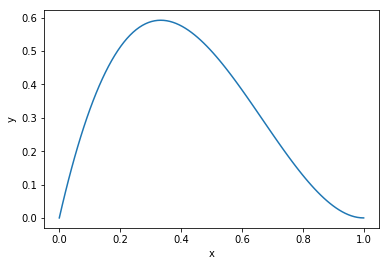

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
x = np.linspace(0,1,100)
df = pd.DataFrame({'x':x,'y':4*x*(1-x)**2})
sns.lineplot(data=df,x='x',y='y')

In [7]:
df.sort_values('y',ascending=False).head(4)

,x,y
33,0.333333,0.592593
34,0.343434,0.592189
32,0.323232,0.592180
35,0.353535,0.590993


In [14]:
x = pd.Series([0.1,0.3,0.5,0.7,0.9])
df = pd.DataFrame({'x':x,'y':np.round(4*x*((1-x)**2),2)})
df

,x,y
0,0.1,0.32
1,0.3,0.59
2,0.5,0.50
3,0.7,0.25
4,0.9,0.04


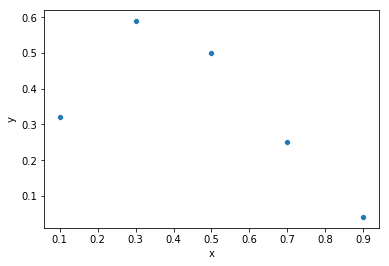

In [15]:
sns.scatterplot(data=df,x='x',y='y')

Comienza la carrera y C muestra una asombrosa velocidad! Le saca una importante diferencia al resto de los competidores en el primer tramo. Por otro lado, B se ubica segundo mientras A esta con una velocidad constante pero insuficiente para alcanzar a los otros dos. 

Ya estamos acercandonos a la mitad del camino cuando C tiene un accidente y se frena!!!! Unos momentos despues A y B lo pasan, B queda en la delantera.
Ya han pasado aproximadamente 20 segundos, cuando C se levanta del piso y comienza a acelerar y a ganar velocidad nuevamente pero, por desgracia, ya quedo muy alejado de los otros dos, que mala suerte tuvo!

Parece un mano a mano entre B y A, la distancia se esta volviendo cada vez mas chica, B esta desacelerando, se lo ve cansado, mientras que A continua con su ritmo constante... se acerca el final, B se esta quedando sin velocidad, A parece con mas energia, A acelera a ultimo momento y logra pasarlo sobre el final!!!!!!! 
A es el ganador de la carrera. B termina en el segundo lugar y C termina de ultimo.

### Decision Networks
https://www.youtube.com/watch?v=19sr7yKV56I BERKELEY DECISION NETWORKS

**MIRAR TODO CON UN FRAMEWORK DE BAYES NETS PARA DECISIONES**

El trabajo de Denicolay puede ser una variable de utilidad a la que apuntan dos variables, una la distribucion de prob de que se de de baja o no y la otra la decision de actuar o no actuar. Todas las variables que usamos como predictoras se conectan a la variable de distrib de prob de dar de baja (es la prob condicional).

Pero ahora podemos usar RELACIONES ENTRE VARIABLES PREDICTORAS (como unas influencian otras) para ver como cambiar los valores entre ellas

> **DECISION NETWORKS AS A FRAMEWORK**

Con esto tambien se puede calcular la ganancia por informacion recopilada y las ganancias segun distintas acciones. Es como que en un mismo framework se puede unificar toda la informacion, conexiones y acciones.

> ver como se incorpora los conceptos de operations research con incertidumbre a esto (deben ser los de search y planning de AIMA

## Juntar todo

**YA SE QUE EL OPERATIONS RESEARCH (OPTIMIZACION) Y LOS MODELOS DE APRENDIZAJE SON LO OPUESTO:**
- EN UNO ASUMIMOS EL MODELO DEL MUNDO DADO Y BUSCAMOS LA MEJOR SOLUCION (VALORES DE VARIABLES DE DECISION)
- EN EL OTRO TENEMOS LOS VALORES DE LAS VARIABLES DE DECISION Y BUSCAMOS APRENDER EL MODELO DEL MUNDO

> **SE PUEDEN JUNTAR LOS DOS EN UN MISMO FRAMEWORK PARA TOMAR DECISIONES A LA VEZ QUE SE MODELA EL MUNDO?**

- ALGORITMOS DE APRENDIZAJE
- BAYES NETS / CAUSAL NETS / FACTOR GRAPHS
- OPERATIONS RESEARCH / OPTIMIZACION / PLANNING

#### Referencias para paper siguiente

Sandra Wichter (mas del lado de etica y explicacion del derecho) the alan turing institute oxford
- https://www.youtube.com/watch?v=3QEQfsIyRJs
- https://arxiv.org/pdf/1711.00399.pdf

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Explaining ML Classifiers through Diverse Conterfactuals (paper)

https://arxiv.org/pdf/1905.07697.pdf


https://www.youtube.com/watch?v=zj2NliGD0Lg&t=424s

### ABSTRACT

Son explicaciones post-hoc de los modelos de ML con la finalidad de tomar decisiones. Usan 
> **contrafacticos**: ejemplos hipoteticos que muestra como obtener diferentes predicciones moviendose en la vecindad de una instancia especifica.

Los contrafacticos deben cumplir con dos propiedades:
- deben ser **posibles** dado el contexto y las restricciones
- debe haber **diversidad** de contrafacticos

### Introduccion

Consideramos una persona que aplica para un prestamo y es rechazado por el algoritmo de la empresa. Tipicamente la empresa da una explicacion "poor credit , sin embargo, esta explicacion no le dice al usuario que deberia hacer para mejorar la situacion y ser aprobado en un futuro. A veces no puede modificarse, como el genero o la edad o la raza.

Es importante mostrar cambios en el resultado con perfiles alternativos ACCIONABLES para ayudar a la gente a entender que podrian haber hecho para cambiar la decision.

Esto aplica para distintas situaciones como decidir la admision a la universidad, identificar personas con alto riesgo de una futura enfermedad, etc.

En todos esos casos, saber las razones de un mal resultado del algoritmo no es suficiente. Es importante saber que hacer para obtener un mejor resultado (asumiendo que el algoritmo permanece relativamente estatico).

**Explicaciones contrafacticas** proveen esa informacion, mostrando **versiones perturbadas de las variables de la misma persona que HABRIA tenido un score favorable** (por ej: HABRIA recibido el prestamo si tus ingresos hubieran sido 10mil mas que lo que es).

Presenta explicaciones **WHAT IF**. Explicaciones contrafacticas (CF = counterfactual) tienen la ventaja de que son siempre confiables con respecto al algorimo en cuestion.


Sin embargo, es dificil generar ejemplos contrafacticos que sean accionables para la situacion de una persona. Un CF puede sugerir que cambie la renta de la casa, pero no dice nada de la factibilidad ni la facilidad de cambiar esas condiciones.

Al igual que todos los sistemas de apoyo para la toma de decisiones basados en ejemplos, necesitamos un conjunto de ejemplos contrafacticos para ayudar a una persona a interpretar los modelos de machine learning complejos. Esos ejemplos deben estar balanceados entre:

- un rango amplio de cambios sugeridos (diversidad) y 
- la facilidad relativa de adoptar esos cambios (proximidad al input original)
- seguir las leyes causales de las sociedades humanas 

Se propone un metodo que genera conjuntos de ejemplos contrafacticos diversos para cualquier clasificador de ML diferenciable. Se construye un problema de optimizacion que considera la diversidad de ejemplos contrafacticos generados, de acuerdo con proximidad al input original.

Resolver el problema de optimizacion requiere considerar un tradeoff entre variables categoricas y continuas que pueden diferir en sus escalas relativas y facilidad de cambio. Damos una solucion general para este problema de optimizacion que puede generar cualquier numero de ejemplos contrafacticos para un input dado.

Para facilitar la accionabilidad, nuestra solucion es flexible suficientemente para para soportar input suministrado por usuarios basado en conocimiento del dominio. Luego damos una metrica de evaluacion cuantitativa para cualquier conjunto de ejemplos CF. Dada la inherente subjetividad, ejemplos CF son dificiles de evaluar. Proponemos metricas que pueden ayudar a ajustar los parametros de una solucion propuesta para conseguir lo buscado.


DATASETS DE PRUEBA
- COMPAS: libertad bajo fianza (bail decision)
- prediccion de ingresos
- riesgo crediticio
- otorgamiento de creditos

Estas tecnicas tambien pueden EXPONER SESGOS EN LOS MODELOS.

En cuanto a la CAUSALIDAD: por si mismos, los ejemplos contrafacticos no tienen ningun conocimiento causal acerca de las variables que modifican. Las variables no existen aisladas, provienen de un proceso de generacion de datos que tiene restricciones. Perturbar independientemente cada variable puede llevar a ejemplos imposibles en la vida real. Para asegurarnos que sean posibles, se propone un metodo basado en restricciones causales que filtre los ejemplos CF.

Contribuciones del trabajo:
- diversidad como el componente mas importante para la accionabilidad de los contrafacticos y para construir un framework de optimizacion general que exponga la importarcia de los tradeoffs necesarios, implicaciones causales y demas problemas de optimizacion.
- framework para evaluar cuantitativamente los contrafacticos que permite un ajuste de los metodos propuestos para un escenario particular. Permite comparar con otros metodos como LIME.



### Background y trabajos relacionados

Las explicaciones son claves para sistemas de ML que sirven para tomar decisiones.

Hay otros tipos de trabajos que quieren explicar los modelos complejos usando otros menos complejos y asumiendo que esos son interpretables:

#### Explicaciones a traves de la importancia de features

determinar la importancia de variables mediante aproximaciones locales. LIME fitea un modelo lineal para aproximar un modelo no lineal localmente. Tambien lo hacen con arboles de decision.
Lundberg y Lee presentan un framework que mide la importancia de las variables para cada prediccion.

El problema que tienen es que, como se estan aproximando con modelos mas simples, no son confiables del todo.

#### Explicaciones a traves de la visualizacion

similar a identificar la importancia de las variables, se puede visualizar las decisiones de un modelo. Pueden ser dificiles de interpretar.

#### Explicaciones a traves de ejemplos

frameworks para explicaciones absadas en ejemplos son los MMD-critic propuestos por Kim et al. 

Las explicaciones contrafacticas son una **perturbacion** de las variables para ver su resultado usando el mismo modelo.

### Contrafactico (Wachter et al.): $$c=argmin_{c} yloss(f(c),y) + |x-c|$$

x = input feature, f = modelo ML, y = output del modelo. 

La primera parte (yloss) empuja el contrafactico c hacia una prediccion diferente de la instancia original. 

La segunda parte (|x-c|) mantiene el contrafactico cerca de la instancia original.


Este paper extiende ese trabajo, al darle diversidad a los contrafacticos. Russell propone integer programming para modelos lineales. Aca se propone una alternativa que funciona para cualquier modelo diferencialble.

### Motor de generacion de contrafacticos

El input de nuestro problema es un modelo ML entrenado f y una instancia x. Queremos generar un conjunto de k contrafacticos {$c_1,c_2,...,c_k$} tal que todos esos producen un resultado diferente que x. Todos estos ejemplos son d-dimensionales.

Aca se ASUME QUE LOS MODELOS SON DIFERENCIABLES Y ESTATICOS y el OUTPUT ES BINARIO.


Objetivo: generar conjunto contrafactico FACTIBLE y accionable. Cosas a las que se puedan llegar en la realidad. Se necesitan que sean lo suficientemente diversos pero al mismo tiempo posible. Se usa la restriccion de factibilidad de Wachter y otras restricciones del usuario.

### Restricciones de diversidad y factibilidad

#### Diversidad mediante procesos puntuales determinantes

https://www.youtube.com/watch?v=o6xbYsOMtFU

Se captura la diversidad mediante procesos puntuales determinantes (DPP determinantal point processes). Se usa la siguiente metrica basado en el determinante de la matriz kernel dado el contrafactico:

$$dpp__diversity = det(K)$$
donde $K_{i,j}=\frac{1}{1+dist(c_i,c_j)}$ es la metrica de distancia entre dos ejemplos contrafacticos. Se añaden perturbaciones random a los elementos diagonales para computar el determinante.

**Proximidad**: ECF que estan mas cerca del input original son los mas valiosos para un usuario. Cuantificamos la proximidad como el vector de distancia (negativo) entre el input original y cada ECF (mediante los features). Se puede usar una metrica de distancia especifica como l1 y esta se puede pesar por el usuario (puede ser hiperparametro para cada feature). Proximidad de un conjunto de ECF es al proximidad media sobre el conjunto:

$$Proximity= -\frac{1}{k}\sum_{i=1}^{k}dist(c_i,x)$$

**Dispersion** (sparsity): propiedad de que sea posible. Intuitivamente, un ECF va a ser mas posible si cambia la menor cantidad de variables. Como es una restriccion no convexa (porque siempre queres menos), lo modificamos aparte (esta en seccion 3.3).

**Restricciones de usuarios**: un ECF puede estar cerca en el espacio de features pero puede no ser posible por restricciones en la vida real. Tiene sentido permitir al usuario que delimite restricciones a la manipulacion de features. Pueden especificarse de dos maneras:
- como ejemplos en cajas (usando rangos de valores para cada feature). Ejemplo: ingresos no pueden superar 200mil.
- alternativamente, el usuario puede especificar las variables que pueden ser modificadas.
Hay una nueva forma de restriccion de VIABILIDAD con restricciones causales en la seccion 6.

### Optimizacion

Basado en los conceptos anteriores de diversidad y proximidad, se construye una funcion de costo sobre todos los contrafacticos generados:

### $$C(x) = argmin_{(c_1,...c_k)} \frac{1}{k}\sum_{i=1}^k yloss(f(c_i),y) + \frac{\lambda_1}{k}\sum_{i=1}^kdist(c_i,x) - \lambda_2dppDiversity(c_1,...c_k)$$

- $c_i$ es un ECF
- $k$ es la cantidad de ECF generados
- $f(.)$ es el modelo ML entrenado
- $yloss(.)$ es la metrica que minimiza el resultado de un ECF con el output buscado $y$ (usualmente 1)
- $d$ numero total de features
- $x$ es el input original
- $dppDiversity(.)$ es la metrica de diversidad
- $\lambda_1$ y $\lambda_2$ son hiperparametros que balancean las tres partes de la funcion!!!


**Implementacion**: optimizamos la funcion anterior usando **gradient descent**. Idealmente podemos obtener $f(c_i)=y$ para cada ECF, pero a veces no es posible porque el objetivo es no-convexo. Hacemos un maximo de 5000 steps o hasta que la funcion de perdida converge y el contrafactico es generado (cuando llega a la clase buscada). Se inicializan todos los ECF de forma aleatoria.

> se puede ampliar a que, en vez que llegue a output binario buscado te devuelva la probabilidad y eso incluirlo en la funcion de perdida


### Consideraciones practicas
Son importantes para apoyar la interaccion con los usuarios de los CF.

**Eleccion de yloss**: como un contrafactico solo necesita pasar el threshold, puede no ser necesario medir la perdida a y, sino al valor que hace pasar al threshold. O lo podemos truncar y decir que si pasa el threshold hay 0 pena (hinge loss).

**Eleccion de funcion de distancia**: para features continuos, se define la distanciacomo la distancia minima l1 de los features entre el ECF y el input. Como los features pueden tener distintos rangos, dividimos por la median absolute deviation (MAD) de cada feature. Con esto captamos la importancia relativa de los cambios. (FORMULAS EN EL PAPER).
Para variables categoricas, es dificil medir la distancia. Aca se usa 1 si cambio en el valor y 0 si no.
> (se puede inferir la facilidad/posibilidad de pasar de un estado a otro segun los datos de entrenamiento?)

**Escala relativa de variables**: como **la escala de una variable influye mucho que tanto importa en la funcion objetivo**, creemos que lo ideal es permitir a los usuarios que pongan sus preferencias para las variables. Igualmente transformamos todas las features en [0,1]. Las continuas son escaladas entre 0 y 1. Para variables categoricas, convertimos cada variable con one-hot encoding y la consideramos como una variable continua.

**Mejorar la dispersion**: mientras la funcion objetivo minimiza la distancia entre el input y el ECF, el ECF ideal necesita ser diverso en la cantidad de features que cambia. Usamos una operacion post-hoc cuando encuentra un ECF que va llevando de a poco los valores de nuevo al original x hasta que cambia de resultado de nuevo al no buscado.

**Eleccion de hiperparametros**: aca usamos $\lambda_1=0.5$ y $\lambda_2=1$.

### Evaluar contrafacticos

Usualmente solo se consideran evaluaciones cualitativas. Aca se presentan cuantitativas. Ultimamente, los ECF deben auydar al usuario a entender el boundary local de decision del clasificador de ML. Se propone una metrica que aproxima una nocion del entendimiento del usuario. 

#### Validez, proximidad y diversidad

En primer lugar definimos metricas cuantitativas para validez, diversidad y proximidad para un conjunto contrafactico que puede ser usado para evaluar cualquier metodo para generar contrafacticos. Asumimos que ya tenemos el conjunto C de ECF:

**Validez**: es la fraccion de ejemplos que cumplen con el outcome buscado.

**Proximidad**: medimos la proximidad basado en distancias de forma separada para las variables categoricas y las continuas. Definimos la proximidad como el promedio de las distancias entre el input x y el ECF. La proximidad para un conjunto es la media de las proximidades individuales.

**Dispersion**: captura el numero de variables que son diferentes (numero de cambios entre el input original x y el ECF. Tambien lo podemos separar para continuo y categorico.

**Diversidad**: de la misma forma que la proximidad, en vez de hacer la distancia al input original, se hace la distancia entre pares de ECF. Para un conjunto, se toma la media de esas distancias. Tambien se hace aparte categoricas y continuas (FORMULAS EN PAPER).

Como hay tradeoffs, la evaluacion de los ECF va a depender de los meritos relativos de la diversidad vs proximidad para cada aplicacion particular.

#### Aproximar el limite de decision local

Idealmente queremos que el usuario entienda el limite de decision del modelo. Los ECF ayudan a explorar los puntos del otro lado del limite de decision del modelo para ayudar a ver como funciona. Para ver si se entiende bien, creamos otro modelo de machine learning que es entrnado con los ejemplos contrafacticos y el input original. Dado este segundo modelo, podemos evaluar la efectividad de los ECF comparando que tan bien el modelo secundario puede imitar al modelo original.

Dados los ECF y el input x, entrenamos un 1-nearest neighbor classifier que prediga el output de la clase para cada nuevo input. Una instancia mas cercana a cualquiera de los ECF va a ser clasificada como que pertenece a la clase deseada, e instancias mas cercanas al input original van a clasificares como la clase original.

Evaluamos la precision del clasificador contra el modelo original en un dataset de test simulado.

#### Datasets

Para evaluar el metodo, se consideran 4 datasets:
- Adult-Income: contiene informacion demografica, educacional y otras de un censo de 1994. 8 features. Tarea: identificar si el income de un individuo es mayor a 50mil.
- LendingClub: contiene 5 años (2007-2011) de datos sobre los prestamos dados por el LendingClub. quedan 8 features. Tarea: decidir si dar credito basado en predicciones sobre si el individuo va a pagar.
- German-Credit: contiene info de individuos que tomaron un prestamo de un banco. 20 features. Tarea: determinar si la persona tiene un buen o malo riesgo crediticio basado en esos atributos.
- COMPAS: decisiones de reincidencia. 5 features. Tarea: otorgar fianza basado en predecir cuales de los aplicantes van a reincidir en los proximos dos años.

Se transforman las categoricas mediante one-hot encoding. Los features continuos son escalados entre 0 y 1. Se entrenan una regresion logistica y una red neuronal con una hidden layer.

#### Lineas de referencia

Se usan como referencias para generar los ECF:

- SingleCF: We follow Wachter et al. [39] and generate a single CF example, optimizing for y-loss difference and proximity.
- MixedIntegerCF: We use the mixed integer programming method proposed by Russell [34] for generating diverse counterfactual examples. This method works only for a linear model.
- RandomInitCF: Here we extend SingleCF to generate k CF examples by initializing the optimizer independently with k random starting points from [0, 1]. Since the optimization loss function is non-convex, one might obtain different CF examples.
- NoDiversityCF: This method utilizes our proposed loss function that optimizes the set of k examples simultaneously (Equation 4), but ignores the diversity term by setting λ2 = 0.

Se compara este nuevo metodo, **DiverseCF** contra esas referencias. Genera un conjutno de ECF y optimiza para ambos diversidad y proximidad. Se inicializa aleatoriamente.
Tambien se considera una variante **DiverseCF-Sparse** que performa mejoramiento de dispersion. Se usa ADAM optimizer y learning rate=0.05 para obtener los ECF. Tambien se compara con LIME.

### Evaluacion cuantitativa

Se evalua DiverseCF basado en las metricas de generacion de CF de diversidad y proximidad, con los lambdas mencionados.

#### Explicar un modelo ML no lineal:

**Validez**: en todos los datasets se encuentra que DiverseCF genera casi 100% de ECF validos para todos los valores requeridos de k (cantidad de ECF). Las otras tecnicas que no tienen diversidad incluida, generan 100% solo en k=1 y despues van bajando. Funciona mejor cuando hay varias variables continuas.

**Diversidad**: DiverseCF tambien genera mas ejemplos diversos que los otros metodos tanto para categoricas como continuas variables. Tambien es el que logra mas cantidad de variables continuas modificadas (dispersion) por mas que no este incluido explicitamente como objetivo.

**Proximidad**: DiverseCF retorna ejemplos con menor proximidad que otros modelos sin diversidad, indicando un claro tradeoff entre diversidad y proximidad. Sin embargo, en muchos casos la diferencia es chica. Se le puede agregar un suplemento para mejorar la proximidad de las variables continuas post-hoc : DiverseCF-Sparse ??????? no entiendo esto. Pero es un parametro que puede usarse para tunear si queremos mas proximidad.


#### Evaluacion cualitativa

En los tres datasets, se realizan perturbaciones de variables importantes. En el COMPAS muestra que, con todo igual, si era blanco, el modelo predecia que no reincidia. Tambien muestra que si era un delito menor tambien habria predicho que no reincidia, comparado al robo en cuestion. Estas respuestas no llevan a tomar decisiones pero proveen al usuario una imagen certera de los escenarios donde ellos habrian podido salir. **En la practica, se pueden decidir cuales son variables no modificables**.

En el dataset de income, muestra que estudiando un master el modelo predice como que supera el umbral de ingresos, pero tambien muestra algunos que no son tan obvios como estar casado... (aca el problema de la causalidad). Esto se da por correlaciones generadas por variables espurias. Para resolver eso se presenta un **metodo de filtrado basado en relaciones causales**. SECCION 6.

Basado en el dominio o caso particular, las personas pueden priorizar cambiar ciertas variables o tener mas o menos dispersos ECF. Esto se hace **cambiando los pesos en las variables** y el learning rate para la optimizacion.



### Aproximar el limite de decision local



### Factibilidad causal de ECF

Hasta ahora fuimos perturbando variables de forma independiente. Pero eso lleva a ejemplos que no son posibles porque las variables estan relacionadas causalmente entre ellas. Es imposible aumentar el grado de educacion sin aumentar la edad. Es importante agregar modelos causales de la geenracion de datos.

Los usuarios pueden proveer de conocimiento especifico en la forma de pares de variables y la direccion de la flecha causal. Con esto construimos restricciones. Por ejemplo, cualquier contrafactico que cambia la causa sin cambiar el efecto es no factible. Con esto construimos un filtro simple luego de hacer la busqueda de contrafacticos

> aca puede haber un punto para mejorar. que la busqueda la haga ya teniendo en cuenta estas cosas y mas como los costos, etc. Ellos mismos dejan esto "Though post-hoc filtering can ensure feasibility of the resultant CF examples, it is more efficient to incorporate causal constraints during CF generation. We leave this for future work."


### Conclusion

trabajos previos de explicaciones contrafacticas 

- [34] Chris Russell. 2019. Efficient Search for Diverse Coherent Explanations. In Proceedings of FAT*.
- [39] Sandra Wachter, Brent Mittelstadt, and Chris Russell. 2017. Counterfactual explanations without opening the black box: Automated decisions and the GDPR.

se propuso un framework para generar y evaluar conjuntos de ECF diversos y factibles.

### Direcciones de futuros trabajos

1- Aca el modelo asume conocimiento del gradiente del modelo ML. Es util construir metodos que puedan trabajar para blackboxes ML modelos completos.

**2- Incorporar conocimiento causal DURANTE la generacion de ECF, en vez del filtrado post-hoc.**

3- Es importante entender las preferencias de la gente con respecto a que restricciones adicionales agregar al framework. Pudiendo proveer interfaces intuitivas para seleccionar escalas de variables y agregar restricciones. Hacer experimentos de comportamiento para apoyar la explroacion interactiva, etc.

4- Estaria bueno tambien estudiar el tradeoff entre la diversidad y el costo cognitivo de tomar una decision (choice overload) cuando el numero de ECF aumenta.

**5- Finally, while we focused on the utility for an end-user who is the subject of a ML-based decision, we argue that CF explanations can be useful for different stakeholders in the decision making process [38], including model designers, decision-makers such as a judge or a doctor, and decision evaluators such as auditors.**

- [38] Richard Tomsett, Dave Braines, Dan Harborne, Alun Preece, and Supriyo Chakraborty. 2018. Interpretable to Whom? A Role-based Model for Analyzing Interpretable Machine Learning Systems. arXiv preprint arXiv:1806.07552 (2018). https://arxiv.org/pdf/1806.07552.pdf


> MIRAR ESTO TAMBIEN (MAS NUEVO) **Multi-Objective Counterfactual Explanations**
https://arxiv.org/pdf/2004.11165v2.pdf

# Datasets

- <s> Economia y finanzas - Denicolay </s>

Prediccion ventas - Fede

Simulacion causal - creado
PISA y TALIS - Denicolay

https://mail.google.com/mail/u/0/#inbox/FMfcgxwJWjFBzTCqKBlFrrkXRCDPStTl

Idea: se pueden usar modelos complejos de ML para predecir el resultado de las pruebas PISA.

- PISA : resultados de examenes a alumnos 15 años
- TALIS : hecho a docentes

## PISA_USA_2009
https://www.kaggle.com/econdata/pisa-test-scores?select=pisa2009test.csv

### Exploracion dataset

In [3]:
import pandas as pd
PISA_USA_2009_train = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_train.csv')
PISA_USA_2009_train.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [5]:
PISA_USA_2009_test = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_test.csv')
len(PISA_USA_2009_test)

1570

In [6]:
1570+3662

5232

In [53]:
PISA_USA_2009_train.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,...,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000
mean,10.126346,0.501243,0.727423,0.834300,0.896023,0.363712,0.735708,0.874068,0.348384,0.857084,...,0.881524,0.915493,0.301574,269.842999,24.561723,0.971417,0.917564,0.362883,1371.649544,0.579950
std,0.523174,0.500102,0.445377,0.371888,0.305294,0.481167,0.441047,0.331842,0.476557,0.350060,...,0.323237,0.278204,0.459036,141.331014,7.042124,0.166667,0.275084,0.480931,847.800992,0.493669
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,0.000000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,0.000000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1233.000000,1.000000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1680.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,1.000000


In [4]:
PISA_USA_2009_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [111]:
PISA_USA_2009_train.readingScore.describe()

count    2414.000000
mean      517.962887
std        89.325693
min       244.480000
25%       455.847500
50%       520.205000
75%       581.395000
max       746.000000
Name: readingScore, dtype: float64

Porcentaje que supera los 500 puntos:  0.4993174993174993
Porcentaje que supera los 600 puntos:  0.15315315315315314
Porcentaje que supera los 700 puntos:  0.009555009555009555
Porcentaje que supera los 800 puntos:  0.0


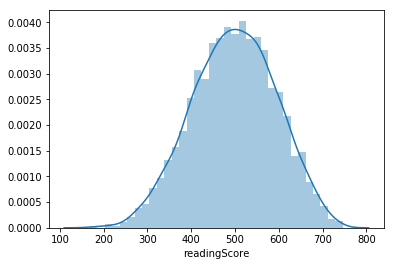

In [7]:
# ver el target

sns.distplot(PISA_USA_2009_train.readingScore)
print('Porcentaje que supera los 500 puntos: ',
    (PISA_USA_2009_train.readingScore>500).sum() / len(PISA_USA_2009_train))
print('Porcentaje que supera los 600 puntos: ',
    (PISA_USA_2009_train.readingScore>600).sum() / len(PISA_USA_2009_train))
print('Porcentaje que supera los 700 puntos: ',
    (PISA_USA_2009_train.readingScore>700).sum() / len(PISA_USA_2009_train))
print('Porcentaje que supera los 800 puntos: ',
    (PISA_USA_2009_train.readingScore>800).sum() / len(PISA_USA_2009_train))

In [10]:
# binarizar target

PISA_USA_2009_train['readingScore'] = np.where(PISA_USA_2009_train.readingScore>500,1,0)
PISA_USA_2009_train.readingScore.value_counts()

/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    1400
0    1014
Name: readingScore, dtype: int64

In [11]:
# FALTANTES

PISA_USA_2009_train = PISA_USA_2009_train.dropna()

In [12]:
# hacer el one-hot encoding para raceeth

vars_encoded = pd.get_dummies(PISA_USA_2009_train['raceeth'])
PISA_USA_2009_train = pd.concat([PISA_USA_2009_train, vars_encoded],axis='columns')

In [13]:
# tambien saco race xq es categorico
PISA_USA_X = PISA_USA_2009_train.drop(columns=['readingScore'])
PISA_USA_y = PISA_USA_2009_train.readingScore

In [14]:
len(PISA_USA_2009_train)

2414

### Clasificacion y ECF a mano

#### Modelo Clasificacion (NN)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc
import keras
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import layers
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D, Bidirectional, GRU, CuDNNGRU
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D, Bidirectional, GRU

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc
#!pip install plot_metric
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [16]:
def prepro_PISA_USA_2009(df_ori_train,df_ori_test, output, binarizar=False, corte=0, 
                         drop_na=False, one_hot=[], cols_eliminar=[]):
    
    df_train = df_ori_train.copy()
    df_test = df_ori_test.copy()
    
    if drop_na:
        df_train = df_train.dropna()
        df_test = df_test.dropna()
    
    if binarizar:
        df_train[output] = np.where(df_train[output]>corte,1,0)
        df_test[output] = np.where(df_test[output]>corte,1,0)

    if len(one_hot) > 0:
        vars_encoded = pd.get_dummies(df_train[one_hot])
        df_train = pd.concat([df_train, vars_encoded],axis='columns')
        df_train = df_train.drop(columns=one_hot)

        vars_encoded = pd.get_dummies(df_test[one_hot])
        df_test = pd.concat([df_test, vars_encoded],axis='columns')
        df_test = df_test.drop(columns=one_hot)

    if len(cols_eliminar) > 0:
        df_train = df_train.drop(columns=[cols_eliminar])
        df_test = df_test.drop(columns=[cols_eliminar])

    df_train_X = df_train.drop(columns=[output])
    df_train_y = df_train[output]
    
    df_test_X = df_test.drop(columns=[output])
    df_test_y = df_test[output]
    
    return(df_train_X,df_train_y,df_test_X,df_test_y)

In [17]:
PISA_USA_2009_train = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_train.csv')
PISA_USA_2009_test = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_test.csv')


PISA_USA_train_X,PISA_USA_train_y,PISA_USA_test_X,PISA_USA_test_y = \
    prepro_PISA_USA_2009(\
        PISA_USA_2009_train,PISA_USA_2009_test, 'readingScore',\
        binarizar=True, corte=500,drop_na=True,one_hot=['raceeth'])

In [18]:
PISA_USA_train_X

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
1,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,0,1173.0,0,0,0,0,0,0,1
3,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1,2640.0,0,0,1,0,0,0,0
4,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1095.0,0,0,0,1,0,0,0
7,10,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,1913.0,0,0,0,0,0,0,1
9,10,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,0,899.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,10,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,149.0,0,0,0,0,0,0,1
3657,10,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1471.0,0,0,0,0,1,0,0
3659,9,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1317.0,0,0,0,0,0,0,1
3660,10,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,1,539.0,0,0,0,1,0,0,0


In [220]:
# PISA_USA_2009_train = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_train.csv')
# PISA_USA_2009_test = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_test.csv')

# # FALTANTES
# PISA_USA_2009_train_clasif = PISA_USA_2009_train.copy()
# PISA_USA_2009_train_clasif = PISA_USA_2009_train_clasif.dropna()

# PISA_USA_2009_test_clasif = PISA_USA_2009_test.copy()
# PISA_USA_2009_test_clasif = PISA_USA_2009_test_clasif.dropna()

# # binarizacion output
# PISA_USA_2009_train_clasif['readingScore'] = np.where(PISA_USA_2009_train_clasif.readingScore>600,1,0)
# PISA_USA_2009_test_clasif['readingScore'] = np.where(PISA_USA_2009_test_clasif.readingScore>600,1,0)

# # hacer el one-hot encoding para raceeth
# vars_encoded = pd.get_dummies(PISA_USA_2009_train['raceeth'])
# PISA_USA_2009_train = pd.concat([PISA_USA_2009_train, vars_encoded],axis='columns')

# vars_encoded = pd.get_dummies(PISA_USA_2009_train['raceeth'])
# PISA_USA_2009_train = pd.concat([PISA_USA_2009_train, vars_encoded],axis='columns')

# # tambien saco race xq es categorico
# PISA_USA_X = PISA_USA_2009_train.drop(columns=['readingScore'])
# PISA_USA_y = PISA_USA_2009_train.readingScore

# PISA_USA_X = PISA_USA_2009_train.drop(columns=['readingScore'])
# PISA_USA_y = PISA_USA_2009_train.readingScore

In [19]:
#Creamos la RN
model = Sequential()
model.add(Dense(29, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  
              metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  870       
_________________________________________________________________
dense_1 (Dense)              multiple                  1500      
_________________________________________________________________
dense_2 (Dense)              multiple                  765       
_________________________________________________________________
dense_3 (Dense)              multiple                  16        
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(PISA_USA_train_X.values, PISA_USA_train_y.values,batch_size=15, 
          epochs=100, verbose=1,validation_split=0.10) 

Train on 2172 samples, validate on 242 samples
Epoch 1/100
2172/2172 [==============================] - 1s 510us/sample - loss: 5.0802 - accuracy: 0.5023 - val_loss: 1.0773 - val_accuracy: 0.5000
Epoch 2/100
2172/2172 [==============================] - 0s 162us/sample - loss: 1.8039 - accuracy: 0.5359 - val_loss: 1.8195 - val_accuracy: 0.4669
Epoch 3/100
2172/2172 [==============================] - 0s 165us/sample - loss: 1.2554 - accuracy: 0.5483 - val_loss: 3.9964 - val_accuracy: 0.5331
Epoch 4/100
2172/2172 [==============================] - 0s 157us/sample - loss: 1.7227 - accuracy: 0.5543 - val_loss: 1.9998 - val_accuracy: 0.5496
Epoch 5/100
2172/2172 [==============================] - 0s 170us/sample - loss: 1.1814 - accuracy: 0.5783 - val_loss: 0.9338 - val_accuracy: 0.5579
Epoch 6/100
2172/2172 [==============================] - 0s 162us/sample - loss: 1.0283 - accuracy: 0.5912 - val_loss: 0.7801 - val_accuracy: 0.5826
Epoch 7/100
2172/2172 [==============================] - 0s

In [21]:
predictions = model.predict(PISA_USA_test_X)
predictions

array([[0.42131275],
       [0.60915416],
       [0.2728317 ],
       [0.5002309 ],
       [0.70357484],
       [0.46997973],
       [0.519824  ],
       [0.17218569],
       [0.6205138 ],
       [0.6039461 ],
       [0.27918   ],
       [0.19710644],
       [0.32745355],
       [0.49948448],
       [0.5343989 ],
       [0.5271752 ],
       [0.41609246],
       [0.50402385],
       [0.6768261 ],
       [0.6235893 ],
       [0.39493415],
       [0.45043293],
       [0.5954301 ],
       [0.43725383],
       [0.58802885],
       [0.6857294 ],
       [0.5998033 ],
       [0.5737694 ],
       [0.67040473],
       [0.20876373],
       [0.53893733],
       [0.28453362],
       [0.3096337 ],
       [0.28615203],
       [0.40397963],
       [0.47918713],
       [0.4861127 ],
       [0.2347855 ],
       [0.21262999],
       [0.3090392 ],
       [0.3893616 ],
       [0.61576045],
       [0.48596314],
       [0.81790763],
       [0.4258263 ],
       [0.71890616],
       [0.6627964 ],
       [0.662

In [22]:
y_probs = [round(x[0],3) for x in predictions]
_, accuracy = model.evaluate(PISA_USA_test_X, PISA_USA_test_y)
print('Accuracy con TEST: %.2f' % (accuracy*100))

fpr, tpr, thresholds =roc_curve(PISA_USA_test_y,y_probs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

990/990 [==============================] - 0s 39us/sample - loss: 0.5925 - accuracy: 0.7081
Accuracy con TEST: 70.81
Area under the ROC curve : 0.767550


In [23]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [24]:
threshold = Find_Optimal_Cutoff(PISA_USA_test_y,y_probs)
print("El punto de corte optimo es ",threshold[0])
print(threshold[0])

El punto de corte optimo es  0.4909999966621399
0.4909999966621399


In [25]:
y_pred = [1 if pred>threshold[0] else 0 for pred in y_probs]

print('TEST')
print();print('Confusion matrix: \n',confusion_matrix(PISA_USA_test_y,y_pred))
print('Accuracy: ',accuracy_score(PISA_USA_test_y,y_pred))
print('f1: ',f1_score(PISA_USA_test_y,y_pred))
print('recall: ',recall_score(PISA_USA_test_y,y_pred))
print('precision: ',precision_score(PISA_USA_test_y,y_pred))

TEST

Confusion matrix: 
 [[288 115]
 [172 415]]
Accuracy:  0.7101010101010101
f1:  0.7430617726051926
recall:  0.706984667802385
precision:  0.7830188679245284


In [31]:
fpr, tpr, threshold = roc_curve(PISA_USA_test_y,y_probs)

lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


IndexError: invalid index to scalar variable.

In [26]:
# hacer dataframe con las instancias y resultados del modelo
prediction_train = model.predict(PISA_USA_train_X)
prediction_test = model.predict(PISA_USA_test_X)


PISA_USA_train_pred = PISA_USA_train_X.copy()
PISA_USA_train_pred = pd.concat([PISA_USA_train_pred,PISA_USA_train_y],axis='columns')
PISA_USA_train_pred['prediccion'] = prediction_train

PISA_USA_test_pred = PISA_USA_test_X.copy()
PISA_USA_test_pred = pd.concat([PISA_USA_test_pred,PISA_USA_test_y],axis='columns')
PISA_USA_test_pred['prediccion'] = prediction_test

PISA_USA_con_predicciones = pd.concat([
    PISA_USA_train_pred , PISA_USA_test_pred ])

In [33]:
# completo (train y test)

PISA_USA_con_predicciones['error'] = PISA_USA_con_predicciones.readingScore - PISA_USA_con_predicciones.prediccion
PISA_USA_con_predicciones['error_absoluto'] = np.abs(PISA_USA_con_predicciones.readingScore - PISA_USA_con_predicciones.prediccion)
PISA_USA_con_predicciones = round(PISA_USA_con_predicciones,6)

# solo test

PISA_USA_test_pred['error'] = PISA_USA_test_pred.readingScore - PISA_USA_test_pred.prediccion
PISA_USA_test_pred['error_absoluto'] = np.abs(PISA_USA_test_pred.readingScore - PISA_USA_test_pred.prediccion)
PISA_USA_test_pred = round(PISA_USA_test_pred,6)

In [34]:
PISA_USA_test_pred[['readingScore','prediccion','error','error_absoluto']].sort_values('prediccion',ascending=False)

,readingScore,prediccion,error,error_absoluto
382,1,0.967437,0.032563,0.032563
213,1,0.851952,0.148048,0.148048
218,1,0.850789,0.149211,0.149211
210,1,0.848818,0.151182,0.151182
211,1,0.843590,0.156410,0.156410
...,...,...,...,...
460,1,0.071046,0.928954,0.928954
1271,0,0.069428,-0.069428,0.069428
462,0,0.064056,-0.064056,0.064056
334,0,0.032078,-0.032078,0.032078


In [40]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.violin(PISA_USA_test_pred, y='prediccion',color='readingScore',
         violinmode='overlay')

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= threshold[0], y1= threshold[0],
      xref= 'x', x0= -1, x1= 1
    )
])



fig.show()

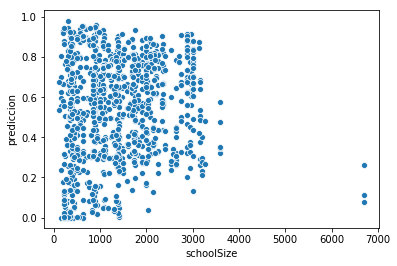

In [205]:
sns.scatterplot(data=PISA_USA_test_pred,x='schoolSize',y='prediccion')


#### ECF a mano (extendidas)

defino las combinaciones de valor (solo de las modificables)... para las continuas puedo definir rangos y pasos (pueden ser basados en metrica de dispersion.

1- fijo un individuo

2- veo la prob de ese individuo

3- defino las combinaciones

4- predigo con las combinaciones

5- me fijo el de max prob

In [41]:
PISA_USA_test_pred.columns

Index(['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'raceeth_American Indian/Alaska Native', 'raceeth_Asian',
       'raceeth_Black', 'raceeth_Hispanic', 'raceeth_More than one race',
       'raceeth_Native Hawaiian/Other Pacific Islander', 'raceeth_White',
       'readingScore', 'prediccion', 'error', 'error_absoluto'],
      dtype='object')

In [42]:
# elijo un individuo con poca probabilidad predicha

PISA_USA_test_pred[(PISA_USA_test_pred.prediccion>0.09) & (PISA_USA_test_pred.raceeth_Black==1)][['male', 'preschool', 'expectBachelors',
                   'motherWork','fatherWork','englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'raceeth_Black',
       'readingScore', 'prediccion','error']].sort_values('prediccion')

,male,preschool,expectBachelors,motherWork,fatherWork,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,raceeth_Black,readingScore,prediccion,error
1488,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,45.0,12.0,1.0,1,0,2041.0,1,0,0.126433,-0.126433
430,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,300.0,25.0,1.0,1,0,898.0,1,0,0.135030,-0.135030
1146,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,270.0,23.0,1.0,1,0,865.0,1,0,0.159055,-0.159055
1159,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,55.0,30.0,1.0,1,0,1382.0,1,0,0.171380,-0.171380
1233,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,525.0,24.0,1.0,1,0,1173.0,1,0,0.179352,-0.179352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,200.0,20.0,1.0,1,0,1733.0,1,0,0.527792,-0.527792
321,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,225.0,11.0,1.0,1,1,1640.0,1,1,0.550608,0.449392
139,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,28.0,1.0,1,0,361.0,1,0,0.601549,-0.601549
507,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,20.0,1.0,1,0,1750.0,1,0,0.647773,-0.647773


In [43]:
# elijo indice=1146

individuo = PISA_USA_test_pred.drop(columns=[\
        'readingScore','prediccion','error','error_absoluto']).loc[1146,:]
individuo

grade                                              10.0
male                                                0.0
preschool                                           0.0
expectBachelors                                     0.0
motherHS                                            1.0
motherBachelors                                     0.0
motherWork                                          0.0
fatherHS                                            0.0
fatherBachelors                                     0.0
fatherWork                                          0.0
selfBornUS                                          1.0
motherBornUS                                        1.0
fatherBornUS                                        1.0
englishAtHome                                       1.0
computerForSchoolwork                               0.0
read30MinsADay                                      0.0
minutesPerWeekEnglish                             270.0
studentsInEnglish                               

In [44]:
# primero definir las variables a cambiar
vars_perturb= ['grade','male','preschool','expectBachelors','motherWork',
              'fatherWork','englishAtHome','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize']

PISA_USA_test_pred[vars_perturb].describe()

,grade,male,preschool,expectBachelors,motherWork,fatherWork,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,10.128283,0.491919,0.722222,0.811111,0.719192,0.850505,0.864646,0.921212,0.295960,267.045455,24.665657,0.965657,0.913131,0.353535,1375.037374
std,0.513427,0.500187,0.448130,0.391618,0.449621,0.356756,0.342274,0.269544,0.456704,142.414549,6.782504,0.182202,0.281785,0.478309,874.559124
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,120.000000
25%,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,636.000000
50%,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1274.500000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1969.250000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2025.000000,90.000000,1.000000,1.000000,1.000000,6694.000000


In [45]:
PISA_USA_test_pred.columns

Index(['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'raceeth_American Indian/Alaska Native', 'raceeth_Asian',
       'raceeth_Black', 'raceeth_Hispanic', 'raceeth_More than one race',
       'raceeth_Native Hawaiian/Other Pacific Islander', 'raceeth_White',
       'readingScore', 'prediccion', 'error', 'error_absoluto'],
      dtype='object')

In [46]:
# hacer combinaciones

# primero definir las variables a cambiar
vars_perturb= ['grade','male','preschool','expectBachelors','motherWork',
              'fatherWork','englishAtHome','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize',
              'raceeth_White','raceeth_Black','raceeth_Asian']

grade=[9,10,11]
male=[0,1]
preschool=[0,1]
expectBachelors=[0,1]
motherWork=[0,1]
fatherWork=[0,1]
englishAtHome=[0,1]
computerForSchoolwork=[0,1]
read30MinsADay=[0,1]
minutesPerWeekEnglish=[210,240,300,300]
studentsInEnglish=[18,20,26,30]
schoolHasLibrary=[0,1]
publicSchool=[0,1]
urban=[0,1]
schoolSize=[200,500,800,1500]
raceeth_White=[0,1]
raceeth_Black=[0,1]
raceeth_Asian=[0,1]

In [47]:
from itertools import product
df_candidatos = pd.DataFrame(list(product(grade,male,preschool,expectBachelors,motherWork,
              fatherWork,englishAtHome,computerForSchoolwork,
               read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,
              schoolHasLibrary,publicSchool,urban,schoolSize,
                raceeth_White,raceeth_Black,raceeth_Asian)), 
             columns=vars_perturb)
df_candidatos

,grade,male,preschool,expectBachelors,motherWork,fatherWork,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,raceeth_White,raceeth_Black,raceeth_Asian
0,9,0,0,0,0,0,0,0,0,210,18,0,0,0,200,0,0,0
1,9,0,0,0,0,0,0,0,0,210,18,0,0,0,200,0,0,1
2,9,0,0,0,0,0,0,0,0,210,18,0,0,0,200,0,1,0
3,9,0,0,0,0,0,0,0,0,210,18,0,0,0,200,0,1,1
4,9,0,0,0,0,0,0,0,0,210,18,0,0,0,200,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145723,11,1,1,1,1,1,1,1,1,300,30,1,1,1,1500,0,1,1
3145724,11,1,1,1,1,1,1,1,1,300,30,1,1,1,1500,1,0,0
3145725,11,1,1,1,1,1,1,1,1,300,30,1,1,1,1500,1,0,1
3145726,11,1,1,1,1,1,1,1,1,300,30,1,1,1,1500,1,1,0


In [48]:
cols_individuo = {}
for ind in individuo.drop(labels=vars_perturb).index:
    cols_individuo[ind] = [individuo[ind]]*len(df_candidatos)
cols_individuo = pd.DataFrame(cols_individuo)
cols_individuo

,motherHS,motherBachelors,fatherHS,fatherBachelors,selfBornUS,motherBornUS,fatherBornUS,raceeth_American Indian/Alaska Native,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3145723,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3145724,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3145725,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3145726,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [49]:
# añadir cols que faltan 

df_candidatos = pd.concat([df_candidatos,cols_individuo],axis='columns')\
    [PISA_USA_test_pred.drop(columns=['readingScore','prediccion','error',
                                     'error_absoluto']).columns]
df_candidatos

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,9,0,0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,200,0.0,0,0,0.0,0.0,0.0,0
1,9,0,0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,200,0.0,1,0,0.0,0.0,0.0,0
2,9,0,0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,200,0.0,0,1,0.0,0.0,0.0,0
3,9,0,0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,200,0.0,1,1,0.0,0.0,0.0,0
4,9,0,0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,200,0.0,0,0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145723,11,1,1,1,1.0,0.0,1,0.0,0.0,1,...,1,1,1500,0.0,1,1,0.0,0.0,0.0,0
3145724,11,1,1,1,1.0,0.0,1,0.0,0.0,1,...,1,1,1500,0.0,0,0,0.0,0.0,0.0,1
3145725,11,1,1,1,1.0,0.0,1,0.0,0.0,1,...,1,1,1500,0.0,1,0,0.0,0.0,0.0,1
3145726,11,1,1,1,1.0,0.0,1,0.0,0.0,1,...,1,1,1500,0.0,0,1,0.0,0.0,0.0,1


In [50]:
# ahora predecir

CF_pred = model.predict(df_candidatos)
df_candidatos['prediccion_CF'] = CF_pred

In [51]:
df_candidatos.sort_values('prediccion_CF',ascending=False)\
            [vars_perturb+['prediccion_CF']]

,grade,male,preschool,expectBachelors,motherWork,fatherWork,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,raceeth_White,raceeth_Black,raceeth_Asian,prediccion_CF
2325565,11,0,0,1,1,0,1,1,1,300,18,0,0,1,1500,1,0,1,0.796178
2324541,11,0,0,1,1,0,1,1,1,300,18,0,0,1,1500,1,0,1,0.796178
1275965,10,0,0,1,1,0,1,1,1,300,18,0,0,1,1500,1,0,1,0.795900
1276989,10,0,0,1,1,0,1,1,1,300,18,0,0,1,1500,1,0,1,0.795900
228413,9,0,0,1,1,0,1,1,1,300,18,0,0,1,1500,1,0,1,0.795621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820178,9,1,1,0,0,1,0,0,0,210,30,1,1,0,800,0,1,0,0.102104
788434,9,1,1,0,0,0,0,0,0,240,30,1,1,0,800,0,1,0,0.102021
2918354,11,1,1,0,0,1,0,0,0,240,30,1,1,0,800,0,1,0,0.101723
1869778,10,1,1,0,0,1,0,0,0,240,30,1,1,0,800,0,1,0,0.101576


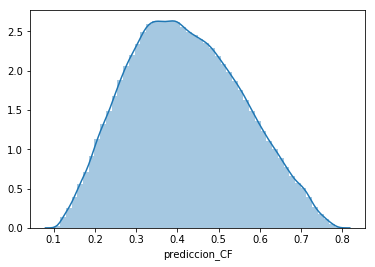

In [52]:
sns.distplot(df_candidatos.prediccion_CF)

'Interesante schoolSize, parece que las escuelas con menos alumnos tienen \npeores resultados en general pero tienen tambien los mas altos.\nEn cambio las escuelas mas grandes tienden al promedio.'

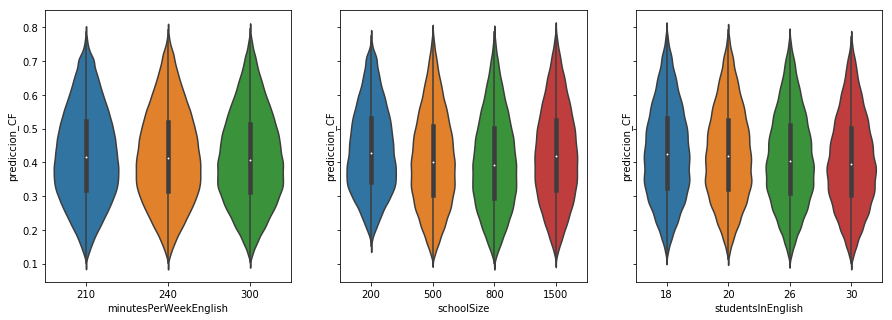

In [53]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'''Interesante schoolSize, parece que las escuelas con menos alumnos tienen 
peores resultados en general pero tienen tambien los mas altos.
En cambio las escuelas mas grandes tienden al promedio.'''

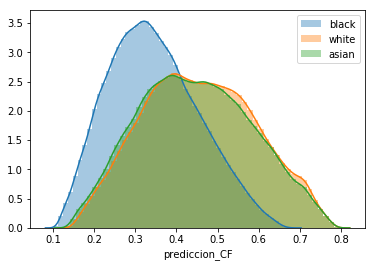

In [54]:
sns.distplot(df_candidatos[df_candidatos.raceeth_Black==1].prediccion_CF,label='black')
sns.distplot(df_candidatos[df_candidatos.raceeth_White==1].prediccion_CF,label='white')
sns.distplot(df_candidatos[df_candidatos.raceeth_Asian==1].prediccion_CF,label='asian')
plt.legend()

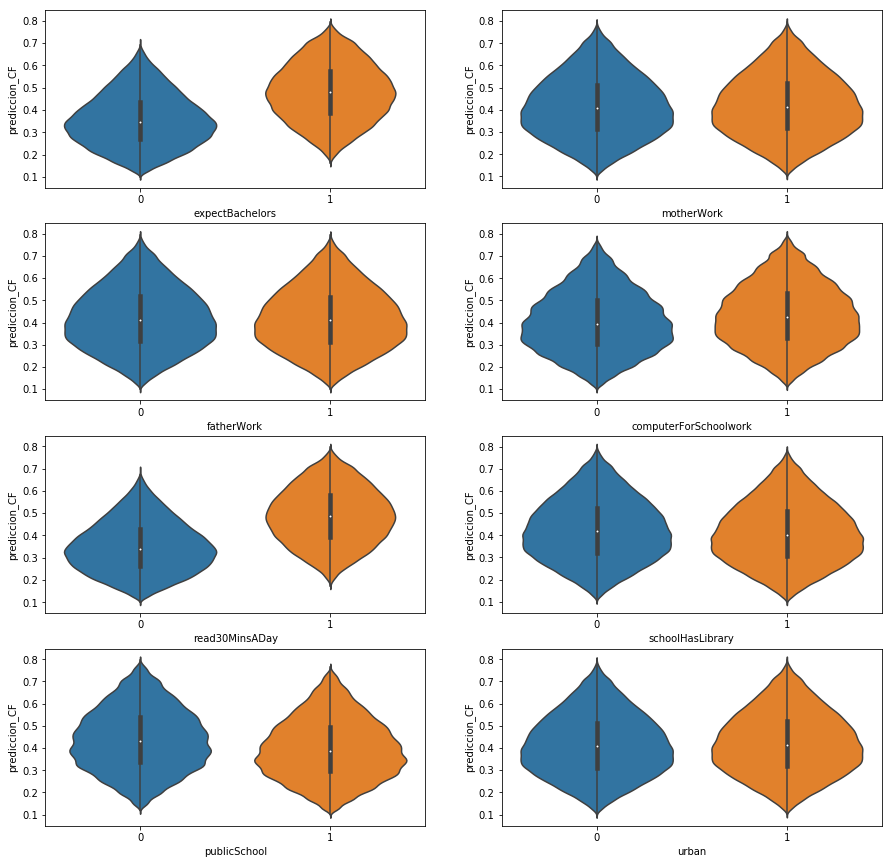

In [55]:
fig, axes = plt.subplots(4,2,figsize=(15,15))
sns.violinplot(data=df_candidatos,x='expectBachelors',y='prediccion_CF',ax=axes[0,0])
sns.violinplot(data=df_candidatos,x='motherWork',y='prediccion_CF',ax=axes[0,1])
sns.violinplot(data=df_candidatos,x='fatherWork',y='prediccion_CF',ax=axes[1,0])
sns.violinplot(data=df_candidatos,x='computerForSchoolwork',y='prediccion_CF',ax=axes[1,1])
sns.violinplot(data=df_candidatos,x='read30MinsADay',y='prediccion_CF',ax=axes[2,0])
sns.violinplot(data=df_candidatos,x='schoolHasLibrary',y='prediccion_CF',ax=axes[2,1])
sns.violinplot(data=df_candidatos,x='publicSchool',y='prediccion_CF',ax=axes[3,0])
sns.violinplot(data=df_candidatos,x='urban',y='prediccion_CF',ax=axes[3,1])

#### ECF a mano (rigurosa)

#### Ejemplo 1

In [56]:
PISA_USA_test_pred[(PISA_USA_test_pred.prediccion>0.25) & 
                   (PISA_USA_test_pred.prediccion<0.40) &
                   (PISA_USA_test_pred.raceeth_White==1)][vars_perturb+['readingScore', 'prediccion','error']].sort_values('prediccion')

,grade,male,preschool,expectBachelors,motherWork,fatherWork,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,...,schoolHasLibrary,publicSchool,urban,schoolSize,raceeth_White,raceeth_Black,raceeth_Asian,readingScore,prediccion,error
499,11,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1,0,1750.0,1,0,0,1,0.250179,0.749821
1373,9,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,300.0,...,1.0,1,0,432.0,1,0,0,0,0.257615,-0.257615
1395,10,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,30.0,...,1.0,1,0,1347.0,1,0,0,0,0.264523,-0.264523
914,10,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,90.0,...,1.0,1,0,2569.0,1,0,0,1,0.271210,0.728790
1400,10,1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,315.0,...,1.0,1,0,1327.0,1,0,0,0,0.271391,-0.271391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,9,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,225.0,...,1.0,1,0,1250.0,1,0,0,0,0.397616,-0.397616
742,10,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,225.0,...,1.0,1,0,366.0,1,0,0,1,0.398006,0.601994
1377,10,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,450.0,...,1.0,1,0,432.0,1,0,0,0,0.398128,-0.398128
353,10,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,225.0,...,1.0,1,0,358.0,1,0,0,1,0.398611,0.601389


In [57]:
# agarro index = 522 blanquito

individuo = PISA_USA_test_pred.drop(columns=[\
        'readingScore','prediccion','error','error_absoluto']).loc[522,:]
individuo

grade                                              10.0
male                                                0.0
preschool                                           0.0
expectBachelors                                     0.0
motherHS                                            1.0
motherBachelors                                     0.0
motherWork                                          0.0
fatherHS                                            0.0
fatherBachelors                                     0.0
fatherWork                                          1.0
selfBornUS                                          1.0
motherBornUS                                        1.0
fatherBornUS                                        1.0
englishAtHome                                       1.0
computerForSchoolwork                               0.0
read30MinsADay                                      1.0
minutesPerWeekEnglish                             480.0
studentsInEnglish                               

In [58]:
# hacer combinaciones

# primero definir las variables a cambiar
vars_perturb= ['expectBachelors','motherWork','fatherWork','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize']

expectBachelors=[0,1]
motherWork=[0,1]
fatherWork=[0,1]
computerForSchoolwork=[0,1]
read30MinsADay=[0,1]
minutesPerWeekEnglish=[380,430,520,570]
studentsInEnglish=[16,18,23,27]
schoolHasLibrary=[0,1]
publicSchool=[0,1]
urban=[0,1]
schoolSize=[200,500,800,1500]

In [59]:
from itertools import product
df_candidatos = pd.DataFrame(list(product(expectBachelors,motherWork,fatherWork,computerForSchoolwork,
               read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,
              schoolHasLibrary,publicSchool,urban,schoolSize)), 
             columns=vars_perturb)
df_candidatos

,expectBachelors,motherWork,fatherWork,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize
0,0,0,0,0,0,380,16,0,0,0,200
1,0,0,0,0,0,380,16,0,0,0,500
2,0,0,0,0,0,380,16,0,0,0,800
3,0,0,0,0,0,380,16,0,0,0,1500
4,0,0,0,0,0,380,16,0,0,1,200
...,...,...,...,...,...,...,...,...,...,...,...
16379,1,1,1,1,1,570,27,1,1,0,1500
16380,1,1,1,1,1,570,27,1,1,1,200
16381,1,1,1,1,1,570,27,1,1,1,500
16382,1,1,1,1,1,570,27,1,1,1,800


In [60]:
cols_individuo = {}
for ind in individuo.drop(labels=vars_perturb).index:
    cols_individuo[ind] = [individuo[ind]]*len(df_candidatos)
cols_individuo = pd.DataFrame(cols_individuo)
cols_individuo

,grade,male,preschool,motherHS,motherBachelors,fatherHS,fatherBachelors,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16380,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16381,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16382,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# añadir cols que faltan 

df_candidatos = pd.concat([df_candidatos,cols_individuo],axis='columns')\
    [PISA_USA_test_pred.drop(columns=['readingScore','prediccion','error',
                                     'error_absoluto']).columns]
df_candidatos

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,200,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,500,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,800,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0,...,0,0,1500,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10.0,0.0,0.0,0,1.0,0.0,0,0.0,0.0,0,...,0,1,200,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,10.0,0.0,0.0,1,1.0,0.0,1,0.0,0.0,1,...,1,0,1500,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16380,10.0,0.0,0.0,1,1.0,0.0,1,0.0,0.0,1,...,1,1,200,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16381,10.0,0.0,0.0,1,1.0,0.0,1,0.0,0.0,1,...,1,1,500,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16382,10.0,0.0,0.0,1,1.0,0.0,1,0.0,0.0,1,...,1,1,800,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
# ahora predecir

CF_pred = model.predict(df_candidatos)
df_candidatos['prediccion_CF'] = CF_pred

In [63]:
df_candidatos.sort_values('prediccion_CF',ascending=False)\
            [vars_perturb+['prediccion_CF']]

,expectBachelors,motherWork,fatherWork,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,prediccion_CF
14212,1,1,0,1,1,570,16,0,0,1,200,0.769043
16260,1,1,1,1,1,570,16,0,0,1,200,0.768000
14244,1,1,0,1,1,570,18,0,0,1,200,0.765609
16292,1,1,1,1,1,570,18,0,0,1,200,0.764556
10116,1,0,0,1,1,570,16,0,0,1,200,0.763027
...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,0,0,0,0,570,23,1,1,0,500,0.219048
2489,0,0,1,0,0,570,18,1,1,0,500,0.218742
441,0,0,0,0,0,570,18,1,1,0,500,0.218620
2457,0,0,1,0,0,570,16,1,1,0,500,0.218571


In [64]:
individuo[vars_perturb]

expectBachelors            0.0
motherWork                 0.0
fatherWork                 1.0
computerForSchoolwork      0.0
read30MinsADay             1.0
minutesPerWeekEnglish    480.0
studentsInEnglish         20.0
schoolHasLibrary           0.0
publicSchool               1.0
urban                      1.0
schoolSize               626.0
Name: 522, dtype: float64

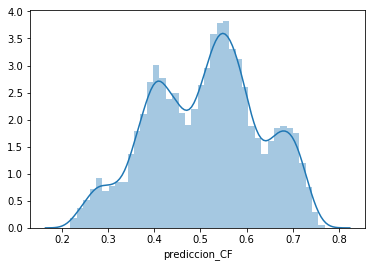

In [65]:
sns.distplot(df_candidatos.prediccion_CF)

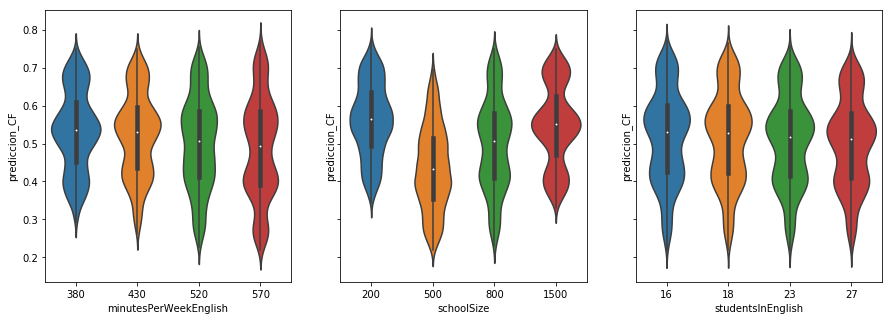

In [66]:
# 2 

fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'Interesante schoolSize, parece que las escuelas con menos alumnos tienen \npeores resultados en general pero tienen tambien los mas altos.\nEn cambio las escuelas mas grandes tienden al promedio.'

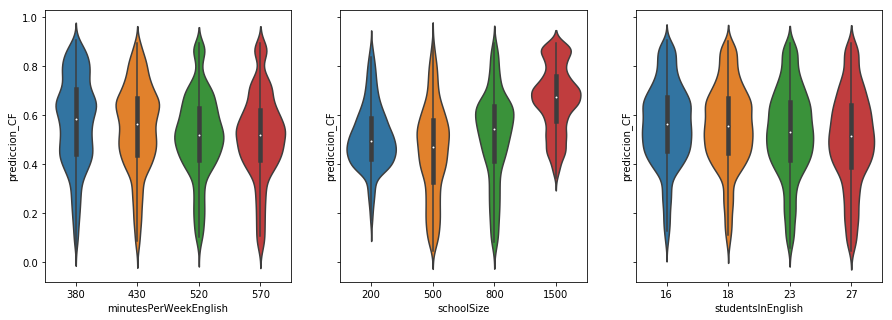

In [307]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'''Interesante schoolSize, parece que las escuelas con menos alumnos tienen 
peores resultados en general pero tienen tambien los mas altos.
En cambio las escuelas mas grandes tienden al promedio.'''

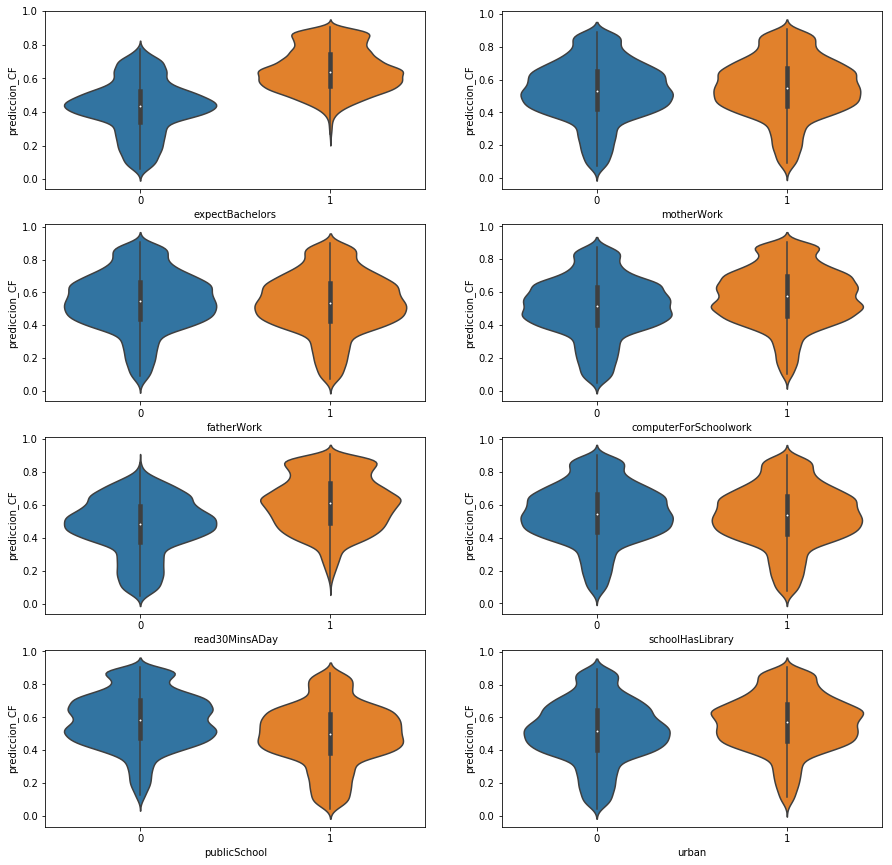

In [316]:

fig, axes = plt.subplots(4,2,figsize=(15,15))
sns.violinplot(data=df_candidatos,x='expectBachelors',y='prediccion_CF',ax=axes[0,0])
sns.violinplot(data=df_candidatos,x='motherWork',y='prediccion_CF',ax=axes[0,1])
sns.violinplot(data=df_candidatos,x='fatherWork',y='prediccion_CF',ax=axes[1,0])
sns.violinplot(data=df_candidatos,x='computerForSchoolwork',y='prediccion_CF',ax=axes[1,1])
sns.violinplot(data=df_candidatos,x='read30MinsADay',y='prediccion_CF',ax=axes[2,0])
sns.violinplot(data=df_candidatos,x='schoolHasLibrary',y='prediccion_CF',ax=axes[2,1])
sns.violinplot(data=df_candidatos,x='publicSchool',y='prediccion_CF',ax=axes[3,0])
sns.violinplot(data=df_candidatos,x='urban',y='prediccion_CF',ax=axes[3,1])

#### Ejemplo 2

In [331]:
PISA_USA_test_pred[(PISA_USA_test_pred.prediccion>0.09) & 
                   (PISA_USA_test_pred.raceeth_Black==1)][vars_perturb+['readingScore', 'prediccion','error']].sort_values('prediccion')

,grade,male,preschool,expectBachelors,motherWork,fatherWork,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,...,schoolHasLibrary,publicSchool,urban,schoolSize,raceeth_White,raceeth_Black,raceeth_Asian,readingScore,prediccion,error
1146,10,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,270.0,...,1.0,1,0,865.0,0,1,0,0,0.109994,-0.109994
737,10,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,200.0,...,1.0,0,1,398.0,0,1,0,0,0.114804,-0.114804
1352,11,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,400.0,...,1.0,1,0,820.0,0,1,0,0,0.116975,-0.116975
19,10,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,270.0,...,1.0,1,0,996.0,0,1,0,0,0.159048,-0.159048
146,11,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,...,1.0,1,0,361.0,0,1,0,1,0.174698,0.825302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,10,0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,200.0,...,1.0,1,0,1733.0,0,1,0,0,0.583320,-0.583320
1491,10,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,250.0,...,1.0,1,0,2041.0,0,1,0,1,0.586901,0.413099
1553,11,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,270.0,...,1.0,1,1,2999.0,0,1,0,0,0.605753,-0.605753
75,10,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,270.0,...,1.0,1,0,1680.0,0,1,0,1,0.722076,0.277924


In [67]:
# agarro index = 19 negrito

individuo = PISA_USA_test_pred.drop(columns=[\
        'readingScore','prediccion','error','error_absoluto']).loc[19,:]
individuo

grade                                              10.0
male                                                0.0
preschool                                           1.0
expectBachelors                                     0.0
motherHS                                            1.0
motherBachelors                                     0.0
motherWork                                          1.0
fatherHS                                            1.0
fatherBachelors                                     0.0
fatherWork                                          1.0
selfBornUS                                          1.0
motherBornUS                                        1.0
fatherBornUS                                        1.0
englishAtHome                                       1.0
computerForSchoolwork                               1.0
read30MinsADay                                      0.0
minutesPerWeekEnglish                             270.0
studentsInEnglish                               

In [68]:
# hacer combinaciones

# primero definir las variables a cambiar
vars_perturb= ['expectBachelors','motherWork','fatherWork','computerForSchoolwork',
               'read30MinsADay','minutesPerWeekEnglish','studentsInEnglish',
              'schoolHasLibrary','publicSchool','urban','schoolSize']

expectBachelors=[0,1]
motherWork=[0,1]
fatherWork=[0,1]
computerForSchoolwork=[0,1]
read30MinsADay=[0,1]
minutesPerWeekEnglish=[380,430,520,570]
studentsInEnglish=[16,18,23,27]
schoolHasLibrary=[0,1]
publicSchool=[0,1]
urban=[0,1]
schoolSize=[200,500,800,1500]

In [69]:
from itertools import product
df_candidatos = pd.DataFrame(list(product(expectBachelors,motherWork,fatherWork,computerForSchoolwork,
               read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,
              schoolHasLibrary,publicSchool,urban,schoolSize)), 
             columns=vars_perturb)
df_candidatos

,expectBachelors,motherWork,fatherWork,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize
0,0,0,0,0,0,380,16,0,0,0,200
1,0,0,0,0,0,380,16,0,0,0,500
2,0,0,0,0,0,380,16,0,0,0,800
3,0,0,0,0,0,380,16,0,0,0,1500
4,0,0,0,0,0,380,16,0,0,1,200
...,...,...,...,...,...,...,...,...,...,...,...
16379,1,1,1,1,1,570,27,1,1,0,1500
16380,1,1,1,1,1,570,27,1,1,1,200
16381,1,1,1,1,1,570,27,1,1,1,500
16382,1,1,1,1,1,570,27,1,1,1,800


In [70]:
cols_individuo = {}
for ind in individuo.drop(labels=vars_perturb).index:
    cols_individuo[ind] = [individuo[ind]]*len(df_candidatos)
cols_individuo = pd.DataFrame(cols_individuo)
cols_individuo

,grade,male,preschool,motherHS,motherBachelors,fatherHS,fatherBachelors,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16380,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16381,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16382,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
# añadir cols que faltan 

df_candidatos = pd.concat([df_candidatos,cols_individuo],axis='columns')\
    [PISA_USA_test_pred.drop(columns=['readingScore','prediccion','error',
                                     'error_absoluto']).columns]
df_candidatos

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,publicSchool,urban,schoolSize,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10.0,0.0,1.0,0,1.0,0.0,0,1.0,0.0,0,...,0,0,200,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.0,0.0,1.0,0,1.0,0.0,0,1.0,0.0,0,...,0,0,500,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10.0,0.0,1.0,0,1.0,0.0,0,1.0,0.0,0,...,0,0,800,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10.0,0.0,1.0,0,1.0,0.0,0,1.0,0.0,0,...,0,0,1500,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10.0,0.0,1.0,0,1.0,0.0,0,1.0,0.0,0,...,0,1,200,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,10.0,0.0,1.0,1,1.0,0.0,1,1.0,0.0,1,...,1,0,1500,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16380,10.0,0.0,1.0,1,1.0,0.0,1,1.0,0.0,1,...,1,1,200,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16381,10.0,0.0,1.0,1,1.0,0.0,1,1.0,0.0,1,...,1,1,500,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16382,10.0,0.0,1.0,1,1.0,0.0,1,1.0,0.0,1,...,1,1,800,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
# ahora predecir

CF_pred = model.predict(df_candidatos)
df_candidatos['prediccion_CF'] = CF_pred

In [73]:
df_candidatos.sort_values('prediccion_CF',ascending=False)\
            [vars_perturb+['prediccion_CF']]

,expectBachelors,motherWork,fatherWork,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,prediccion_CF
14212,1,1,0,1,1,570,16,0,0,1,200,0.605185
16260,1,1,1,1,1,570,16,0,0,1,200,0.603784
14244,1,1,0,1,1,570,18,0,0,1,200,0.600581
16292,1,1,1,1,1,570,18,0,0,1,200,0.599174
10116,1,0,0,1,1,570,16,0,0,1,200,0.597138
...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,0,0,0,0,570,16,1,1,0,500,0.100932
2522,0,0,1,0,0,570,23,1,1,0,800,0.100839
474,0,0,0,0,0,570,23,1,1,0,800,0.100723
2554,0,0,1,0,0,570,27,1,1,0,800,0.100358


In [74]:
individuo[vars_perturb]

expectBachelors            0.0
motherWork                 1.0
fatherWork                 1.0
computerForSchoolwork      1.0
read30MinsADay             0.0
minutesPerWeekEnglish    270.0
studentsInEnglish         18.0
schoolHasLibrary           1.0
publicSchool               1.0
urban                      0.0
schoolSize               996.0
Name: 19, dtype: float64

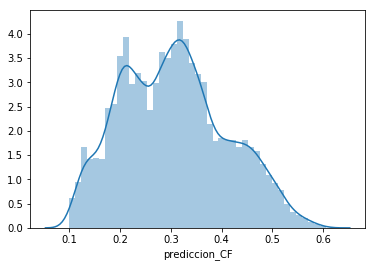

In [75]:
sns.distplot(df_candidatos.prediccion_CF)

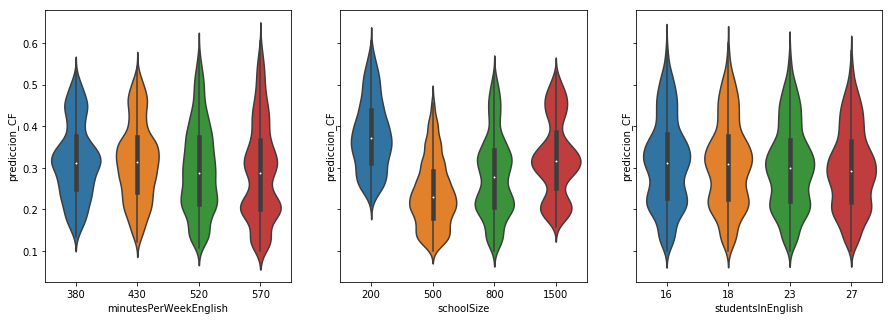

In [76]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'Interesante schoolSize, parece que las escuelas con menos alumnos tienen \npeores resultados en general pero tienen tambien los mas altos.\nEn cambio las escuelas mas grandes tienden al promedio.'

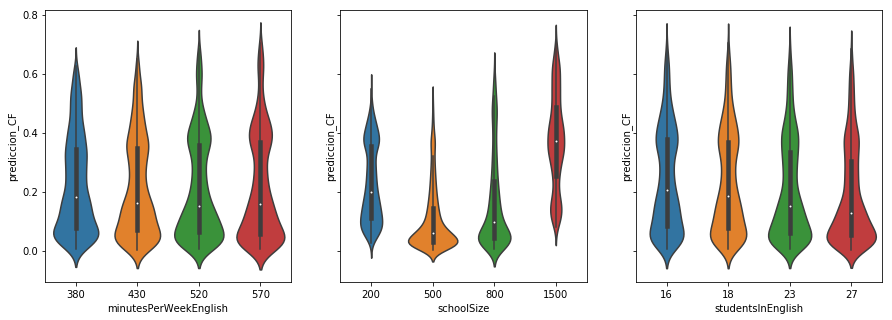

In [341]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))

sns.violinplot(data=df_candidatos,x='minutesPerWeekEnglish',y='prediccion_CF',ax=axes[0])
sns.violinplot(data=df_candidatos,x='schoolSize',y='prediccion_CF',ax=axes[1])
sns.violinplot(data=df_candidatos,x='studentsInEnglish',y='prediccion_CF',ax=axes[2])

'''Interesante schoolSize, parece que las escuelas con menos alumnos tienen 
peores resultados en general pero tienen tambien los mas altos.
En cambio las escuelas mas grandes tienden al promedio.'''

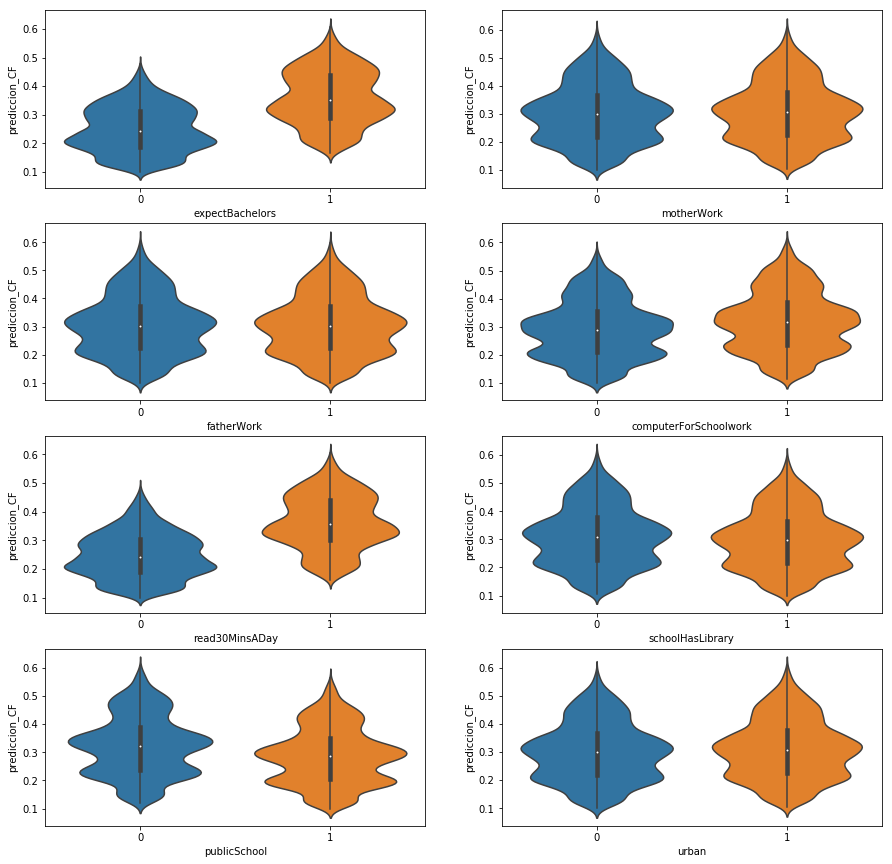

In [77]:

fig, axes = plt.subplots(4,2,figsize=(15,15))
sns.violinplot(data=df_candidatos,x='expectBachelors',y='prediccion_CF',ax=axes[0,0])
sns.violinplot(data=df_candidatos,x='motherWork',y='prediccion_CF',ax=axes[0,1])
sns.violinplot(data=df_candidatos,x='fatherWork',y='prediccion_CF',ax=axes[1,0])
sns.violinplot(data=df_candidatos,x='computerForSchoolwork',y='prediccion_CF',ax=axes[1,1])
sns.violinplot(data=df_candidatos,x='read30MinsADay',y='prediccion_CF',ax=axes[2,0])
sns.violinplot(data=df_candidatos,x='schoolHasLibrary',y='prediccion_CF',ax=axes[2,1])
sns.violinplot(data=df_candidatos,x='publicSchool',y='prediccion_CF',ax=axes[3,0])
sns.violinplot(data=df_candidatos,x='urban',y='prediccion_CF',ax=axes[3,1])

### Regresion (NN)

In [135]:
PISA_USA_2009_train = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_train.csv')
PISA_USA_2009_test = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_test.csv')

PISA_USA_2009_original = pd.concat([PISA_USA_2009_train,PISA_USA_2009_test],axis='rows').reset_index(drop=True)
PISA_USA_2009_original['id'] = range(len(PISA_USA_2009_original))

In [136]:
# FALTANTES
PISA_USA_2009_original = PISA_USA_2009_original.dropna()

# hacer el one-hot encoding para raceeth
vars_encoded = pd.get_dummies(PISA_USA_2009_original['raceeth'])
PISA_USA_2009 = pd.concat([PISA_USA_2009_original, vars_encoded],axis='columns')

# separo X,y
PISA_USA_2009_X = PISA_USA_2009.drop(columns=['readingScore','raceeth'])
PISA_USA_2009_y = PISA_USA_2009.readingScore

# split train test
from sklearn.model_selection import train_test_split
PISA_USA_2009_X_train, PISA_USA_2009_X_test, PISA_USA_2009_y_train, PISA_USA_2009_y_test = \
        train_test_split(PISA_USA_2009_X, PISA_USA_2009_y, test_size=0.25, random_state=1)

In [137]:
# volver a poner train y test pero con raceeth

PISA_USA_2009_original_train = PISA_USA_2009_X_train.merge(PISA_USA_2009_original[['id','raceeth','readingScore']],left_on='id',right_on='id')\
    .drop(columns=vars_encoded.columns)
PISA_USA_2009_original_test = PISA_USA_2009_X_test.merge(PISA_USA_2009_original[['id','raceeth','readingScore']],left_on='id',right_on='id')\
    .drop(columns=vars_encoded.columns)

PISA_USA_2009_X_train = PISA_USA_2009_X_train.drop(columns='id')
PISA_USA_2009_X_test = PISA_USA_2009_X_test.drop(columns='id')

In [16]:
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [124]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(29, input_dim=29, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [155]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, batch_size=10, verbose=0)
# results = cross_val_score(estimator, PISA_USA_X.values, PISA_USA_y.values, cv=5, verbose=1)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [156]:
estimator.fit(PISA_USA_2009_X_train.values, PISA_USA_2009_y_train.values)
prediction_train = estimator.predict(PISA_USA_2009_X_train)
prediction_test = estimator.predict(PISA_USA_2009_X_test)

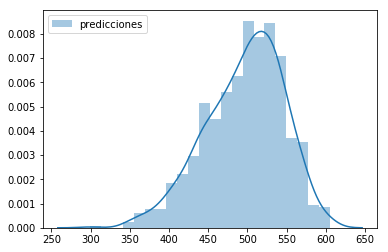

In [157]:
sns.distplot(prediction_test,label='predicciones')
plt.legend()

In [158]:
dist_error = PISA_USA_2009_y_test - prediction_test
test_error =  np.abs(PISA_USA_2009_y_test - prediction_test)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)

print('Error medio: ',mean_error,'\n','Desvio estandar: ',std_error)

Error medio:  64.40667330140097 
 Desvio estandar:  46.68961190199686


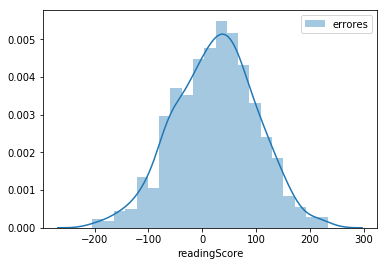

In [159]:
sns.distplot(dist_error,label='errores')
plt.legend()

In [160]:
# hacer dataframe con las instancias y resultados del modelo

PISA_USA_train_pred = PISA_USA_2009_original_train.copy()
# PISA_USA_train_pred = pd.concat([PISA_USA_train_pred,PISA_USA_2009_y_train],axis='columns')
PISA_USA_train_pred['prediccion'] = prediction_train

PISA_USA_test_pred = PISA_USA_2009_original_test.copy()
# PISA_USA_test_pred = pd.concat([PISA_USA_test_pred,PISA_USA_2009_y_test],axis='columns')
PISA_USA_test_pred['prediccion'] = prediction_test

PISA_USA_con_predicciones = pd.concat([
    PISA_USA_train_pred , PISA_USA_test_pred ])

In [163]:
PISA_USA_con_predicciones['error'] = PISA_USA_con_predicciones.readingScore - PISA_USA_con_predicciones.prediccion
PISA_USA_con_predicciones['error_absoluto'] = np.abs(PISA_USA_con_predicciones.readingScore - PISA_USA_con_predicciones.prediccion)

In [164]:
PISA_USA_con_predicciones[['readingScore','prediccion','error','error_absoluto']].sort_values('prediccion',ascending=False)

,readingScore,prediccion,error,error_absoluto
24,658.22,616.755920,41.464080,41.464080
1496,746.00,613.941467,132.058533,132.058533
1483,600.39,605.535828,-5.145828,5.145828
984,661.16,605.172180,55.987820,55.987820
811,723.52,605.172180,118.347820,118.347820
...,...,...,...,...
1285,341.64,318.408203,23.231797,23.231797
2181,376.77,312.525757,64.244243,64.244243
943,362.65,307.754669,54.895331,54.895331
58,476.16,299.322845,176.837155,176.837155


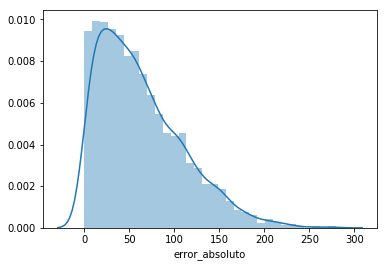

In [165]:
sns.distplot(PISA_USA_con_predicciones.error_absoluto)

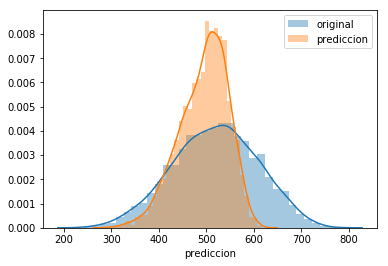

In [166]:
'''mmmm me parece que predice todo muy cerca de 500'''

import seaborn as sns

sns.distplot(PISA_USA_con_predicciones.readingScore,label='original')
plt.legend()
sns.distplot(PISA_USA_con_predicciones.prediccion,label='prediccion')
plt.legend()

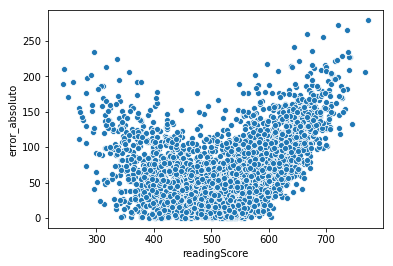

In [167]:
sns.scatterplot(data=PISA_USA_con_predicciones, x='readingScore',y='error_absoluto')

In [168]:
PISA_USA_con_predicciones.sort_values('error_absoluto')

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,schoolHasLibrary,publicSchool,urban,schoolSize,id,raceeth,readingScore,prediccion,error,error_absoluto
457,10,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1,1,1276.0,884,Black,413.70,413.708252,-0.008252,0.008252
1185,11,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1,0,247.0,1713,White,538.93,538.883362,0.046638,0.046638
1244,11,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1,0,774.0,223,White,556.89,556.976624,-0.086624,0.086624
684,10,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1,0,361.0,3803,White,465.34,465.241058,0.098942,0.098942
547,10,0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1,0,1680.0,4049,White,530.48,530.641235,-0.161235,0.161235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,10,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1,1,3592.0,3719,Hispanic,694.46,439.246674,255.213326,255.213326
1355,10,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1,0,3004.0,3458,Black,667.04,407.134308,259.905692,259.905692
1882,11,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1,0,2183.0,5023,Hispanic,735.91,471.116089,264.793911,264.793911
625,10,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1,1,3164.0,2114,White,720.91,448.786041,272.123959,272.123959


### ECF DiCE clasificacion

Hago toda la **clasificacion** de nuevo aca usando el formato armado de DiCE

Mas para la redaccion https://towardsdatascience.com/dice-diverse-counterfactual-explanations-for-hotel-cancellations-762c311b2c64

In [220]:
PISA_USA_2009_train = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_train.csv')
PISA_USA_2009_test = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA USA dataset/PISA_USA_2009_test.csv')

# FALTANTES
PISA_USA_2009_train_clasif = PISA_USA_2009_train.copy()
PISA_USA_2009_train_clasif = PISA_USA_2009_train_clasif.dropna()

PISA_USA_2009_test_clasif = PISA_USA_2009_test.copy()
PISA_USA_2009_test_clasif = PISA_USA_2009_test_clasif.dropna()

# binarizacion output
PISA_USA_2009_train_clasif['readingScore'] = np.where(PISA_USA_2009_train_clasif.readingScore>600,1,0)
PISA_USA_2009_test_clasif['readingScore'] = np.where(PISA_USA_2009_test_clasif.readingScore>600,1,0)


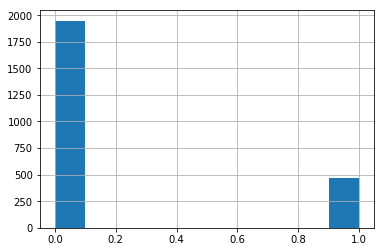

In [221]:
PISA_USA_2009_train_clasif.readingScore.hist()

In [222]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers # helper functions

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras

# supress deprecation warnings from TF
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [223]:
d = dice_ml.Data(dataframe=PISA_USA_2009_train_clasif, \
    continuous_features=['minutesPerWeekEnglish', 'studentsInEnglish','schoolSize'], \
    outcome_name='readingScore')

In [224]:
# aca entreno el modelo. Ya fue

# sess = tf.InteractiveSession()

train, _ = d.split_data(d.normalize_data(d.one_hot_encoded_data))
X_train = train.loc[:, train.columns != 'readingScore']
y_train = train.loc[:, train.columns == 'readingScore']

ann_model = keras.Sequential()
ann_model.add(keras.layers.Dense(30, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
ann_model.fit(X_train, y_train, validation_split=0.20, epochs=100, verbose=0, class_weight={0:1,1:2})

In [225]:
backend = 'TF'+tf.__version__[0] 
m = dice_ml.Model(model=ann_model, backend=backend)

# initiate DiCE
exp = dice_ml.Dice(d, m)

In [226]:
exp

In [228]:
PISA_USA_2009_train_clasif.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

In [232]:
# query instance in the form of a dictionary; keys: feature name, values: feature value
query_instance = {'grade':11, 'male':0, 'raceeth':'Black', 'preschool':0.0, 'expectBachelors':0.0, 'selfBornUS':0.0,
       'englishAtHome':0.0, 'computerForSchoolwork':0.0, 'read30MinsADay':0.0,
       'minutesPerWeekEnglish':45.0, 'studentsInEnglish':20, 'schoolHasLibrary':0.0,
       'publicSchool':1, 'urban':1, 'schoolSize':500}

In [233]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite",verbose=2)

step 1,  loss=8.74398
step 51,  loss=0.543468
step 101,  loss=0.191329
step 151,  loss=0.160907
step 201,  loss=0.146318
step 251,  loss=0.13938
step 301,  loss=0.135366
step 351,  loss=-0.181249
step 401,  loss=-0.189938
step 451,  loss=-0.192968
step 501,  loss=-0.194663
step 551,  loss=-0.195784
step 601,  loss=-0.195139
step 651,  loss=-0.19834
step 701,  loss=-0.198336
step 751,  loss=-0.19891
step 801,  loss=-0.196145
step 851,  loss=-0.199582
step 901,  loss=-0.197988
step 951,  loss=-0.20306
step 1001,  loss=-0.200828
step 1051,  loss=-0.196425
step 1101,  loss=-0.197846
step 1151,  loss=-0.195943
step 1201,  loss=-0.19944
step 1251,  loss=-0.200044
step 1301,  loss=-0.201211
step 1351,  loss=-0.193234
step 1401,  loss=-0.201972
step 1451,  loss=-0.200183
step 1501,  loss=-0.196137
step 1551,  loss=-0.199778
step 1601,  loss=-0.199699
step 1651,  loss=-0.195831
step 1701,  loss=-0.194324
step 1751,  loss=-0.194833
step 1801,  loss=-0.196918
step 1851,  loss=-0.19695
step 1901, 

In [236]:
# visualize the resutls
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,0,Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,20.0,0.0,1,1,500.0,0.005767



Diverse Counterfactual set (new outcome : 1)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,0,White,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,29.8,21.7,0.0,1,1,575.6,0.434
1,11,0,Native Hawaiian/Other Pacific Islander,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,70.1,20.2,0.0,0,1,437.7,0.434
2,11,0,Asian,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,43.4,20.0,0.0,0,1,506.5,0.763
3,11,0,White,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,20.0,0.0,1,1,493.5,0.744


In [235]:
pd.set_option('display.max_columns', None)

It may be the case that some features are harder to change than others (e.g., education level is harder to change than working hours per week). DiCE allows input of relative difficulty in changing a feature through specifying feature weights. **A higher feature weight means that the feature is harder to change than others.** For instance, one way is to use the mean absolute deviation from the median as a measure of relative difficulty of changing a continuous feature.

Median Absolute Deviation (MAD) of a continuous feature conveys the variability of the feature, and is more robust than standard deviation as is less affected by outliers and non-normality. The inverse of MAD would then imply the ease of varying the feature and is hence used as feature weights in our optimization to reflect the difficulty of changing a continuous feature. By default, DiCE computes this internally and divides the distance between continuous features by the MAD of the feature's values in the training set. Let's see what their values are by computing them below:

In [258]:
# get MAD ->  FIJARES BIEN QUE HACE ESTO
mads = d.get_mads(normalized=True)

mads

{'minutesPerWeekEnglish': 0.014880955,
 'studentsInEnglish': 0.06756756,
 'schoolSize': 0.09311495}

In [255]:
mads_nonormal = d.get_mads(normalized=False)

mads_nonormal

{'minutesPerWeekEnglish': 25.0, 'studentsInEnglish': 5.0, 'schoolSize': 614.0}

In [256]:
for feature in mads_nonormal:
    print(feature, 1/mads_nonormal[feature])

minutesPerWeekEnglish 0.04
studentsInEnglish 0.2
schoolSize 0.0016286644951140066


Esto no tiene mucho sentido. Es mas facil ponerse a estudiar un poco mas que cambiar el tamaño del colegio.

Mmmm pero se refiere a que, al usar otros rangos, puede ser mas facil cambiar de 500 a 505 que en el otro cambiar de 5 a 10

In [259]:
# create feature weights
feature_weights = {}
for feature in mads:
    feature_weights[feature] = round(1/mads[feature], 2)
print(feature_weights)

{'minutesPerWeekEnglish': 67.2, 'studentsInEnglish': 14.8, 'schoolSize': 10.74}


The above feature weights encode that **changing age is approximately seven times more difficult than changing categorical variables**, and changing hours_per_week is approximately three times more difficult than changing age. Of course, this may sound odd, since a person cannot change their age. 

**In this case, what it's reflecting is that there is a higher diversity in age values than hours-per-week values. Below we show how to over-ride these weights to assign custom user-defined weights.**

Now, let's try to assign unit weights to the continuous features and see how it affects the counterfactual generation. DiCE allows this through feature_weights parameter.

In [260]:
# assigning equal weights
feature_weights = {'minutesPerWeekEnglish': 50, 'studentsInEnglish': 30, 'schoolSize': 10}

In [261]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite", 
                                        feature_weights=feature_weights)

Only 2 (required 4) Diverse Counterfactuals found for the given configuation, perhaps try with different values of proximity (or diversity) weights or learning rate... ; total time taken: 15 min 34 sec


In [262]:
# visualize the resutls
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,0,Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,20.0,0.0,1,1,500.0,0.005767



Diverse Counterfactual set (new outcome : 1)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,0,White,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.8,19.5,0.0,1,1,492.6,0.434
1,11,0,Native Hawaiian/Other Pacific Islander,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,92.2,21.9,0.0,1,1,351.9,0.434
2,11,0,Asian,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,43.4,20.0,0.0,0,1,506.5,0.753
3,11,0,White,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,43.4,20.0,0.0,1,1,506.5,0.764


> FIJARSE ESTO PARA COMBINAR LOS PESOS DE VARIAR DISTINTAS VARIABLES CON ESCALAS DIFERENTES: Note that **we transform continuous features and one-hot-encode categorical features to fall between 0 and 1 in order to handle relative scale of features**. However, this also means that the relative ease of changing continuous features is higher than categorical features when the total number of continuous features are very less compared to the total number of categories of all categorical variables combined. This is reflected in the above table where continuous features (age and hours_per_week) have been varied to reach their extreme values (range of age: [17, 90]; range of hours_per_week: [1, 99]) for most of the counterfactuals. This is the reason why the distances are divided by a scaling factor. Deviation from the median provides a robust measure of the variability of a feature’s values, and thus dividing by the MAD allows us to capture the relative prevalence of observing the feature at a particular value (see our paper for more details).

> En la parte de INTERPRETACION buscar muchos contrafacticos segun una caracteristica (raza) y ver como cambiando manteniendo fijo raza y cambiando los demas (para el inicial) como varia en el contrafactico y sacar el promedio de eso

#### 3. Trading off between proximity and diversity goals

We acknowledge that **not all counterfactual explanations may be feasible for a user**. In general, counterfactuals closer to an individual's profile will be more feasible. Diversity is also important to help an individual choose between multiple possible options. DiCE allows tunable parameters *proximity_weight* (default: 0.5) and *diversity_weight* (default: 1.0) to handle proximity and diversity respectively. Below, we increase the proximity weight and see how the counterfactuals change.

In [264]:
# change proximity_weight from default value of 0.5 to 1.5
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite", 
                                        proximity_weight=1.5, diversity_weight=1.0) 

KeyboardInterrupt: 

In [ ]:
# visualize the resutls
dice_exp.visualize_as_dataframe()

As we see from above table, both continuous and categorical features are more closer to the original query instance and the counterfactuals are also less diverse than before.

#### 4. Selecting the features to vary

While counterfactuals provide *actionable* alternative profiles to achieve a different outcome, we note that some of the generated explanations suggest changes in features that cannot be varied easily (such as age), or sensitive attributes like race or gender. Hence, DiCE allows feeding in a list of features that are allowed to vary through a *features_to_vary* parameter. 

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

In [271]:
features_to_vary = ['englishAtHome', 'raceeth', 'motherWork','fatherWork','computerForSchoolwork', 'read30MinsADay', 
                    'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary', 
                    'publicSchool', 'urban', 'schoolSize',]

In [281]:
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite", 
                                        features_to_vary=features_to_vary)

Only 0 (required 4) Diverse Counterfactuals found for the given configuation, perhaps try with different values of proximity (or diversity) weights or learning rate... ; total time taken: 13 min 01 sec


In [278]:
# visualize the resutls
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,0,Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,20.0,0.0,1,1,500.0,0.005767



Diverse Counterfactual set (new outcome : 1)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,0,Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0,1,484.3,0.064
1,11,0,Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,41.0,1.0,0,1,100.0,0.063
2,11,0,Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,18.1,18.7,1.0,0,1,3714.9,0.063
3,11,0,Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,230.4,20.1,1.0,0,1,450.0,0.063


The above counterfactual examples show the importance of educational level in the model's predictions. All the generated counterfactuals suggest getting an advanced degree for a higher income (Masters or Ph.D.).

Dataset PISA desde la pagina

Instrucciones 

https://www.oecd.org/pisa/data/httpoecdorgpisadatabase-instructions.htm

Archivos principales son los datasets de:
- alumnos
- escuelas
- cognitivos

Desde 2006 tambien:
- padres
- procesos

Desde 2012 tambien:
- alfabetizacion financiera

Desde 2015 tambien:
- profesores

**Alumnos**: tiene respuesta a cuestionarios, y cierta info de los alumnos.

**Escuelas**: info ...




## PISA_2009_RESUMIDO

https://github.com/jbryer/pisa

- **Student** results which include the student background questionnaire as well as the outcomes of the math, science, and reading assessments (data(pisa.student))

- **School** results from the school questionnaire (data(pisa.school))

- **Parent** results from the parent questionnaire (data(pisa.parent))

- The detailed item results from the **cognitive assessments** (data(pisa.items))

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc
#!pip install plot_metric
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Preprocesamiento

lista de variables
https://www.oecd.org/pisa/pisaproducts/Codebook_STQ09_DEC11.pdf

Plan:
1

1- dejar solo MEXICO (mucha cantidad de datos) o ITALIA (quedan muchos desp de filtros)

2- sacar variables con NA

3- si quedan buena cant de variables:

    4- armar DiCE
    
    5- decidir conjunto de variables de decision
    
    6- tirarlo
    
3- sino:

    4- preseleccionar variables interesantes
    
    

In [23]:
PISA_2009 = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA_2009/pisa.student.csv.gz',compression='gzip')

/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (14,15,16,26,27,28,33,34,35,117,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
# explicacion columnas 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

columnas_PISA_2009 = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA_2009/pisa.catalog.student.csv',
                                engine='python',
                                quotechar='"', error_bad_lines=False).set_index('Column')
columnas_PISA_2009

,x
Column,
CNT,Country code 3-character
COUNTRY,Country code ISO 3-digit
OECD,OECD country
SUBNATIO,Adjudicated sub-region
SCHOOLID,School ID 5-digit
STIDSTD,Student ID 5-digit
ST01Q01,Grade
ST02Q01,<Programme>
ST03Q02,Birth Month


In [56]:
# dejo solo mexico
# PISA_mexico = PISA_2009[PISA_2009.CNT=='Mexico']

# le saco los NA: primero filtrar las cols: las que tengan mas del 50% NA
PISA_2009_noNA = PISA_2009.drop(columns=[col for col in PISA_2009 if PISA_2009[col].isna().sum() > len(PISA_2009)/2])
# ahora saco las filas con any NA
PISA_2009_noNA = PISA_2009_noNA.dropna(axis='rows',how='any')
# PISA_2009_noNA = PISA_2009.dropna(subset=[col for col in PISA_2009 if PISA_2009[col].dtype == 'object'])

print('cantidad que queda: \n','Filas: ', len(PISA_2009_noNA),'\nColumnas: ',len(PISA_2009_noNA.columns))

cantidad que queda: 
 Filas:  28346 
Columnas:  289


In [57]:
# ver distrib de dtypes

# pd.Series([val[1] for val in [[col,PISA_2009_noNA[col].dtype] for col in PISA_2009_noNA.columns]]).value_counts()
PISA_2009_noNA.dtypes.value_counts()

object     223
float64     62
int64        4
dtype: int64

In [58]:
# elimino las columnas de Unnamed y el ID del estudiante (dejo la escuela)
PISA_2009_noNA = PISA_2009_noNA.drop(columns=[
    'StIDStd','Unnamed: 0'])

# cambio de int a float el st03q02
PISA_2009_noNA['ST03Q02'] = PISA_2009_noNA['ST03Q02'].astype('float64')

# cambio de int a categorical el SCHOOLID
# PISA_2009_noNA['SCHOOLID'] = PISA_2009_noNA['SCHOOLID'].astype('object')

PISA_2009_noNA = PISA_2009_noNA.drop(columns=[
    'PROGN','LANGN','SCHOOLID','SUBNATIO','COBN_M','COBN_F','COBN_S'])


In [59]:
PISA_2009_noNA.dtypes.value_counts()

object     217
float64     63
dtype: int64

In [60]:
# crear un solo target

PISA_2009_noNA['target'] = PISA_2009_noNA[[col for col in PISA_2009_noNA.columns if 'PV' in col]].\
apply(lambda x: x.mean(),axis=1)

PISA_2009_noNA = PISA_2009_noNA.drop(columns=[col for col in PISA_2009_noNA.columns if 'PV' in col])

In [112]:
# ver que son las columnas que quedaron
columnas_PISA_2009[columnas_PISA_2009.index.isin([col for col in PISA_2009_noNA.columns if col in (columnas_PISA_2009.index)])]

,x
Column,
CNT,Country code 3-character
COUNTRY,Country code ISO 3-digit
OECD,OECD country
ST03Q02,Birth Month
ST04Q01,Sex
ST05Q01,Attend <ISCED 0>
ST06Q01,Age at <ISCED 1>
ST07Q01,Repeat <ISCED 1>
ST07Q02,Repeat <ISCED 2>


In [62]:
# eliminar otras variables sospechosas de estar correlacionadas

PISA_2009_noNA = PISA_2009_noNA.drop(columns=[
    'W_FSTUWT','TESTLANG','CNTFAC'])

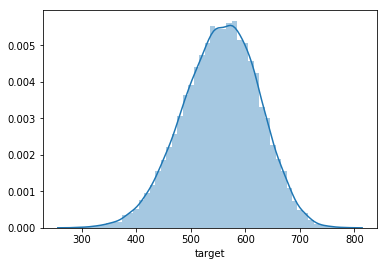

In [63]:
sns.distplot(PISA_2009_noNA.target)

In [64]:
PISA_2009_noNA.target.mean()

554.5638304993095

In [65]:
# binarizo el outcome 'target'

PISA_2009_noNA['target'] = np.where(PISA_2009_noNA['target'] > 500,1,0)

PISA_2009_noNA['target'] = PISA_2009_noNA['target'].astype('object')

In [66]:
PISA_2009_noNA.CNT.value_counts().head(10)

Italy                 4974
Canada                4493
Switzerland           2070
Australia             2059
Belgium               1534
Hungary               1429
New Zealand           1233
Austria               1205
Russian Federation    1196
Macao-China            976
Name: CNT, dtype: int64

Quedo muy bien ITALIA. Pruebo primero con todo y despues voy a italia

In [67]:
PISA_2009_noNA.dtypes.value_counts()

object     217
float64     46
dtype: int64

### DiCE



#### Clasificador

In [69]:
ver_var_probl = PISA_2009_noNA.loc[:,[col for col in PISA_2009_noNA if (PISA_2009_noNA[col].dtype=='float64') or (col=='target')]].iloc[:,11:31]
ver_var_probl
# columnas_PISA_2009[columnas_PISA_2009.index.isin([col for col in ver_var_probl.columns if col in (columnas_PISA_2009.index)])]

'''Alguna de estas (de la 11:31) es la responsable, o varias'''
ver_var_probl.describe()

,BFMJ,BMMJ,GRADE,HISEI,LMINS,MMINS,SMINS,METASUM,UNDREM,PARED,ATTCOMP,ATSCHL,CSTRAT,CULTPOSS,DISCLIMA,DIVREAD,ELAB,ENTUSE,ESCS,HEDRES
count,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.00000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000,28346.000000
mean,46.462534,46.723065,-0.012735,53.593629,241.680378,236.243668,233.365836,0.29149,0.296689,13.824261,0.103731,0.083709,0.212923,0.071892,0.120047,0.111526,0.006059,0.029349,0.264140,0.216789
std,16.804781,16.391362,0.493257,15.472254,87.683803,86.880218,131.818477,0.89615,0.918765,2.709875,0.924191,0.958274,0.934356,0.950679,0.977477,0.879721,0.969888,0.878106,0.891042,0.865455
min,16.000000,16.000000,-3.000000,16.000000,0.000000,0.000000,0.000000,-2.00980,-1.882400,3.000000,-2.440500,-2.988700,-3.453100,-2.120700,-2.809100,-3.953100,-2.409800,-3.098000,-3.191100,-4.249900
25%,33.000000,36.000000,0.000000,43.000000,180.000000,180.000000,150.000000,-0.33270,-0.416800,12.000000,-0.108000,-0.435200,-0.294500,-0.548100,-0.547300,-0.477000,-0.620800,-0.368900,-0.355800,-0.244600
50%,44.000000,45.000000,0.000000,53.000000,225.000000,225.000000,225.000000,0.50580,0.316000,14.500000,-0.108000,0.018500,0.215900,0.105200,0.025800,0.140700,0.038500,0.152500,0.261650,0.165700
75%,56.000000,55.000000,0.000000,68.000000,275.000000,270.000000,300.000000,0.92500,1.048800,16.500000,0.860500,0.509100,0.782600,0.999000,0.927200,0.543600,0.603400,0.546900,0.941400,0.993300
max,90.000000,90.000000,3.000000,90.000000,960.000000,1000.000000,1000.000000,1.34430,1.415200,17.500000,0.860500,2.008500,2.504000,1.838000,1.837900,4.645700,2.757100,2.993400,3.094800,1.990600


In [550]:
# # PRUEBAS CON VARS CATEGORICAS TAMBIEN
# '''ASI FUNCIONA, 243 variables'''

# PISA_2009_noNA['split'] = np.random.uniform(0,1,len(PISA_2009_noNA))
# PISA_2009_train = PISA_2009_noNA.copy()
# PISA_2009_test = PISA_2009_noNA.copy()

# PISA_2009_train = PISA_2009_train[PISA_2009_train.split<0.75].drop(columns='split').drop(columns=ver_var_probl.columns)
# PISA_2009_test = PISA_2009_test[PISA_2009_test.split>=0.75].drop(columns='split').drop(columns=ver_var_probl.columns)

In [ ]:
# # separar train test . ASI FUNCIONA (27 VARIABLES CONTINUAS)

# PISA_2009_noNA['split'] = np.random.uniform(0,1,len(PISA_2009_noNA))
# PISA_2009_train = PISA_2009_noNA.copy()
# PISA_2009_test = PISA_2009_noNA.copy()

# PISA_2009_train = PISA_2009_train[PISA_2009_train.split<0.75].loc[:,[col for col in PISA_2009_train if (PISA_2009_train[col].dtype=='float64') or (col=='target')]].drop(columns='split').drop(columns=ver_var_probl.columns)
# PISA_2009_test = PISA_2009_test[PISA_2009_test.split>=0.75].loc[:,[col for col in PISA_2009_test if (PISA_2009_test[col].dtype=='float64') or (col=='target')]].drop(columns='split').drop(columns=ver_var_probl.columns)



In [72]:
# PRUEBAS CON VARS CATEGORICAS TAMBIEN
'''ASI FUNCIONA, 243 variables'''

PISA_2009_junto = PISA_2009_noNA.copy()

PISA_2009_junto = PISA_2009_junto.drop(columns=ver_var_probl.columns)

print(PISA_2009_junto.shape)
print(PISA_2009_junto.dtypes.value_counts())
print(PISA_2009_junto.columns)

(28346, 243)
object     217
float64     26
dtype: int64
Index(['CNT', 'COUNTRY', 'OECD', 'ST03Q02', 'ST04Q01', 'ST05Q01', 'ST06Q01',
       'ST07Q01', 'ST07Q02', 'ST07Q03',
       ...
       'STIMREAD', 'STRSTRAT', 'STUDREL', 'USESCH', 'WEALTH', 'RFSINTRP',
       'RFSNCONT', 'RFSTRLIT', 'RFSFUMAT', 'target'],
      dtype='object', length=243)


In [76]:
# preprocesamiento y clasificacion con DiCE

def prepro_DiCE(df,target,modo_prepro='todo'):
    
    if modo_prepro=='todo':
        df['split'] = np.random.uniform(0,1,len(df))
        vars_continuas = [col for col in df.columns if df[col].dtype=='float64']
        print(vars_continuas)

        d = dice_ml.Data(dataframe=df,
                 continuous_features=vars_continuas,
                 outcome_name=target)

        junto, _ = d.split_data(d.normalize_data(d.one_hot_encoded_data))
        print(junto.dtypes.value_counts())

        junto_train = junto[junto.split <= 0.75].drop(columns='split')
        X_train = junto_train.loc[:, junto_train.columns != target]
        y_train = junto_train.loc[:, [target]]
        y_train.loc[:,target] = y_train[target].astype('category')

        junto_test = junto[junto.split > 0.75].drop(columns='split')
        X_test = junto_test.loc[:, junto_test.columns != target]
        y_test = junto_test.loc[:, [target]]
        y_test.loc[:,target] = y_test[target].astype('category')

        print('shape X_train:', X_train.shape, 'y_train: ',y_train.shape)
        print('shape X_test:', X_test.shape, 'y_test: ',y_test.shape)

        return(d,X_train,y_train,X_test,y_test)
    
    else:
        
        df['split'] = np.random.uniform(0,1,len(df))
        train = df.copy()
        test = df.copy()
        train = train[train.split<0.75].drop(columns='split')
        test = test[test.split>=0.75].drop(columns='split')
        
        vars_continuas = [col for col in train.columns if train[col].dtype=='float64']
        print('Variables completas: ',vars_continuas)

        d = dice_ml.Data(dataframe=train,
                 continuous_features=vars_continuas,
                 outcome_name=target)
        
        train, _ = d.split_data(d.normalize_data(d.one_hot_encoded_data))
        X_train = train.loc[:, train.columns != target]
        y_train = train.loc[:, train.columns == target]
        y_train.loc[:,target] = y_train[target].astype('category')

        
        return(d,X_train,y_train)
    
    

def clasificacion_DiCE(preprocesar=False,modo_prepro='todo',modelar=False,df=[],
                       dfs=(),target='target',modelo='chico',verbose=1):
    
    # import DiCE
    import dice_ml
    from dice_ml.utils import helpers # helper functions
    # Tensorflow libraries
    import tensorflow as tf
    from tensorflow import keras
    # supress deprecation warnings from TF
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

    
    if preprocesar:
    
        if modo_prepro=='todo':
            # PREPRO DiCE
            d,X_train,y_train,X_test,y_test = prepro_DiCE(df,target,modo_prepro='todo')
        else:
            d,X_train,y_train = prepro_DiCE(df,target,modo_prepro='train')
    else:
        X_train,y_train,X_test,y_test = dfs
    
    
    if modelar:
    
        # RED NEURONAL

        if modelo=='chico':
            ann_model = keras.Sequential()
            ann_model.add(keras.layers.Dense(50, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(15, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

            ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
            ann_model.fit(X_train.values,y_train.values, validation_split=0.15, epochs=5)

        else:
            ann_model = keras.Sequential()
            ann_model.add(keras.layers.Dense(2000, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(800, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(200, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(20, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
            ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

            ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
            print(ann_model.summary())
            ann_model.fit(X_train.values,y_train.values, validation_split=0.15, epochs=10, verbose=verbose)

        if preprocesar:
            if modo_prepro=='todo':
                return(d,ann_model,X_train,y_train,X_test,y_test)
            else:
                return(d,ann_model,X_train,y_train)
        else:
            return(ann_model)
    
    else:
        if modo_prepro=='todo':
            return(d,X_train,y_train,X_test,y_test)
        else:
            return(d,X_train,y_train)

In [78]:
d,ann_model,X_train,y_train = clasificacion_DiCE(
    preprocesar=True,modo_prepro='train',modelar=True,
    df=PISA_2009_junto,target='target',modelo='chico')

Variables completas:  ['ST03Q02', 'ST06Q01', 'ST28Q01', 'ST28Q02', 'ST28Q03', 'ST29Q01', 'ST29Q02', 'ST29Q03', 'ST30Q01', 'ST35Q01', 'AGE', 'HIGHCONF', 'HOMEPOS', 'JOYREAD', 'LIBUSE', 'MEMOR', 'ONLNREAD', 'STIMREAD', 'STRSTRAT', 'STUDREL', 'USESCH', 'WEALTH', 'RFSINTRP', 'RFSNCONT', 'RFSTRLIT', 'RFSFUMAT']


/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Train on 14564 samples, validate on 2571 samples
Epoch 1/5
14564/14564 [==============================] - 3s 187us/sample - loss: 0.7262 - accuracy: 0.8044 - val_loss: 0.5735 - val_accuracy: 0.8222
Epoch 2/5
14564/14564 [==============================] - 2s 123us/sample - loss: 0.5682 - accuracy: 0.8280 - val_loss: 0.5629 - val_accuracy: 0.8230
Epoch 3/5
14564/14564 [==============================] - 2s 136us/sample - loss: 0.5724 - accuracy: 0.8243 - val_loss: 0.5662 - val_accuracy: 0.8242
Epoch 4/5
14564/14564 [==============================] - 2s 130us/sample - loss: 0.5674 - accuracy: 0.8276 - val_loss: 0.6111 - val_accuracy: 0.8009
Epoch 5/5
14564/14564 [==============================] - 2s 119us/sample - loss: 0.5647 - accuracy: 0.8288 - val_loss: 0.5774 - val_accuracy: 0.8219


In [80]:
X_train.shape

(17135, 1983)

In [81]:
'WEALTH' in X_train.columns

True

In [99]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']) 

def metricas_evaluacion_clasif(modelo,X,y,tipo='test'):
    print('\n\n',tipo,'\n\n')
    predictions = modelo.predict(X)
    sns.distplot(predictions)
    y_probs = [round(x[0],3) for x in predictions]
    _, accuracy = modelo.evaluate(X, y)
    print('Accuracy con', tipo,': %.2f' % (accuracy*100))
    fpr, tpr, thresholds =roc_curve(y,y_probs)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    threshold = Find_Optimal_Cutoff(y,y_probs)
    print("El punto de corte optimo es ",threshold[0])
    y_pred = [1 if pred>threshold[0] else 0 for pred in y_probs]
    print();print('Confusion matrix: \n',confusion_matrix(y,y_pred))
    print('Accuracy: ',accuracy_score(y,y_pred))
    print('f1: ',f1_score(y,y_pred))
    print('recall: ',recall_score(y,y_pred))
    print('precision: ',precision_score(y,y_pred))
    

def df_con_predict(modelo,modo_prepro='todo',dfs=(),target='target'):
    
    if modo_prepro=='todo':
        X_train,y_train,X_test,y_test = dfs
    else:
        X_train,y_train = dfs
    
    # hacer dataframe con las instancias y resultados del modelo
    prediction_train = modelo.predict(X_train)

    train_pred = X_train.copy()
    train_pred = pd.concat([train_pred,y_train],axis='columns')
    train_pred['prediccion'] = prediction_train
    train_pred['tipo'] = 'train'
    
    if modo_prepro=='todo':
        prediction_test = modelo.predict(X_test)
        test_pred = X_test.copy()
        test_pred = pd.concat([test_pred,y_test],axis='columns')
        test_pred['prediccion'] = prediction_test
        test_pred['tipo'] = 'test'

        df_con_predicciones = pd.concat([
            train_pred , test_pred ])
    else:
        df_con_predicciones = train_pred.copy()
    
    df_con_predicciones['error'] = df_con_predicciones[target].astype('float64') - df_con_predicciones.prediccion
    df_con_predicciones['error_absoluto'] = np.abs(df_con_predicciones[target].astype('float64') - df_con_predicciones.prediccion)
    df_con_predicciones = round(df_con_predicciones,6)
    
    return(df_con_predicciones)



def evaluar_clasificador(modelo,modo_prepro='todo',dfs=(),target='target',graficar=False):
    
    if modo_prepro=='todo':
        X_train,y_train,X_test,y_test = dfs
        
        # TRAIN 
        metricas_evaluacion_clasif(modelo,X_train,y_train,'TRAIN')
        print('paso evaluacion train \n\n')

        # TEST
        metricas_evaluacion_clasif(modelo,X_test,y_test,'TEST')
        print('paso evaluacion test \n\n')
        
        # hacer dataframe con las instancias y resultados del modelo
        df_con_predicciones = df_con_predict(modelo,modo_prepro='todo',dfs=dfs,target=target)
        
    else:
        X_train,y_train = dfs
        
        # TRAIN 
        metricas_evaluacion_clasif(modelo,X_train,y_train,'TRAIN')
        print('paso evaluacion train \n\n')
        
        # hacer dataframe con las instancias y resultados del modelo
        df_con_predicciones = df_con_predict(modelo,modo_prepro='train',dfs=dfs,target=target)
    
    
    # GRAFICAR
    if graficar:
        import plotly.express as px
        fig = px.violin(df_con_predicciones, y='prediccion',color=target,
                 violinmode='overlay')
        fig.show()
    
    
    return(df_con_predicciones)

    



 TRAIN 


17135/17135 [==============================] - 1s 59us/sample - loss: 0.5569 - accuracy: 0.8319
Accuracy con TRAIN : 83.19
Area under the ROC curve : 0.869215
El punto de corte optimo es  0.8420000076293945

Confusion matrix: 
 [[ 2931   788]
 [ 2894 10522]]
Accuracy:  0.7851181791654508
f1:  0.8510879236431287
recall:  0.7842874180083482
precision:  0.9303271441202475
paso evaluacion train 




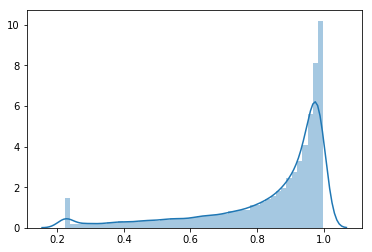

In [100]:
# evaluar modelo de arriba

df_con_predicciones = evaluar_clasificador(ann_model,modo_prepro='train',
                        dfs=(X_train,y_train),target='target',graficar=True)

In [101]:
df_con_predicciones[['target','tipo','prediccion','error','error_absoluto']].sort_values('prediccion',ascending=False)

,target,tipo,prediccion,error,error_absoluto
42135,1,train,0.999517,0.000483,0.000483
39036,1,train,0.999513,0.000487,0.000487
36814,1,train,0.999223,0.000777,0.000777
359872,1,train,0.999211,0.000789,0.000789
42235,1,train,0.999154,0.000846,0.000846
...,...,...,...,...,...
252919,0,train,0.223166,-0.223166,0.223166
105189,0,train,0.223166,-0.223166,0.223166
392541,0,train,0.223166,-0.223166,0.223166
389338,0,train,0.223165,-0.223165,0.223165


Guardar modelo y cargarlo

In [605]:
# # save model and architecture to single file
# ann_model.save("/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA_2009/ann_model1.h5")
# print("Saved model to disk")

Saved model to disk


In [83]:
# # load and evaluate a saved model
# from numpy import loadtxt

# import tensorflow as tf 
# loaded_model = tf.keras.models.load_model('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/PISA_2009/ann_model1.h5')
# # summarize model.
# loaded_model.summary()

#### ECF

In [102]:
backend = 'TF'+tf.__version__[0] 
m = dice_ml.Model(model=ann_model, backend=backend)

# initiate DiCE
exp = dice_ml.Dice(d, m)

In [127]:
# agarrar una instancia del conjunto de entrenamiento

# df_con_predicciones[(df_con_predicciones.WEALTH>-0.01) &
#                     (df_con_predicciones.WEALTH<0.01)].sort_values('prediccion').head(20)

df_con_predicciones[df_con_predicciones.prediccion < 0.5].\
        sort_values('WEALTH').head(10)[['WEALTH','prediccion','target']]

,WEALTH,prediccion,target
362075,0.011459,0.304899,0
103126,0.131959,0.381517,0
193063,0.138507,0.257477,0
453240,0.143307,0.465235,0
105895,0.169610,0.364317,0
450031,0.172676,0.223167,0
187343,0.175506,0.223168,0
302130,0.177365,0.293243,0
191610,0.181180,0.365823,0
193108,0.181180,0.415691,0


Hacer comparaciones segun WEALTH: (todos con baja probabilidad)
- uno bajo: 204081
- uno medio: 17390
- uno alto: 17640

In [128]:
indiv = 453240

# ver que son las columnas que quedaron
pd.concat([columnas_PISA_2009[columnas_PISA_2009.index.isin([col for col in PISA_2009_junto.columns if col in (columnas_PISA_2009.index)])]  ,  PISA_2009_junto.loc[indiv,:]],axis='columns')


# columnas = columnas_PISA_2009[columnas_PISA_2009.index.isin([col for col in PISA_2009_train.columns if col in (columnas_PISA_2009.index)])]
# for ind in indiv:
#     columnas = pd.concat([columnas  ,  PISA_2009_train.drop(columns=['target']).loc[ind,:]],axis='columns')
# columnas

,x,453240
CNT,Country code 3-character,Trinidad and Tobago
COUNTRY,Country code ISO 3-digit,Trinidad and Tobago
OECD,OECD country,Non-OECD
ST03Q02,Birth Month,12
ST04Q01,Sex,Male
ST05Q01,Attend <ISCED 0>,"Yes, more than one year"
ST06Q01,Age at <ISCED 1>,4
ST07Q01,Repeat <ISCED 1>,"No, never"
ST07Q02,Repeat <ISCED 2>,"No, never"
ST07Q03,Repeat <ISCED 3>,"No, never"


ELEGIR DE ARRIBA LAS VARIABLES QUE QUEREMOS MODIFICAR

In [129]:
# vars_decision = ['ST12Q01','ST16Q01','ST20Q02','ST20Q03','ST20Q04','ST20Q05',
#                 'ST20Q06','ST20Q07','ST20Q08','ST20Q09','ST20Q10','ST20Q12',
#                 'ST21Q03','ST21Q04','ST22Q01','ST23Q01','ST24Q01','ST24Q02',
#                 'ST24Q03','ST24Q05','ST24Q06','ST24Q07','ST24Q10','ST25Q02',
#                  'ST25Q03','ST25Q04','ST25Q05','ST26Q01','ST26Q02','ST26Q03',
#                 'ST27Q01','ST27Q02','ST27Q03','ST27Q04','ST27Q05','ST27Q06',
#                 'ST27Q08','ST27Q13','ST28Q01','ST28Q02','ST28Q03','ST29Q01',
#                 'ST29Q02','ST29Q03','ST30Q01','ST32Q01','ST32Q02','ST32Q03',
#                 'ST32Q04','ST40Q01']+[col for col in PISA_2009_junto.columns if 'ST3' in col]+\
#                 [col for col in PISA_2009_junto.columns if 'IC01' in col]+\
#                 [col for col in PISA_2009_junto.columns if 'IC07' in col]+\
#                 ['IMMIG','ISCEDO','HIGHCONF','HOMEPOS','JOYREAD','LIBUSE','MEMOR',
#                  'ONLNREAD','STIMREAD','STRSTRAT','STUDREL','USESCH','WEALTH',
#                 'RFSINTRP','RFSNCONT','RFSTRLIT','RFSFUMAT']

vars_decision = ['IMMIG','ISCEDO','HIGHCONF','HOMEPOS','JOYREAD','LIBUSE','MEMOR',
                 'ONLNREAD','STIMREAD','STRSTRAT','STUDREL','USESCH','WEALTH',
                'RFSINTRP','RFSNCONT','RFSTRLIT','RFSFUMAT']

len(vars_decision)

17

In [130]:
query_instance = PISA_2009_junto.drop(columns=['target','split']).loc[indiv,:]
query_instance = query_instance.to_dict()

print(len(query_instance))
query_instance

242


{'CNT': 'Trinidad and Tobago',
 'COUNTRY': 'Trinidad and Tobago',
 'OECD': 'Non-OECD',
 'ST03Q02': 12.0,
 'ST04Q01': 'Male',
 'ST05Q01': 'Yes, more than one year',
 'ST06Q01': 4.0,
 'ST07Q01': 'No, never',
 'ST07Q02': 'No, never',
 'ST07Q03': 'No, never',
 'ST08Q01': 'No',
 'ST08Q02': 'No',
 'ST08Q03': 'No',
 'ST08Q04': 'No',
 'ST08Q05': 'Yes',
 'ST08Q06': 'Yes',
 'ST09Q01': 'Bookbinders Etc Workers',
 'ST10Q01': '<ISCED level 3A>',
 'ST11Q01': 'No',
 'ST11Q02': 'No',
 'ST11Q03': 'No',
 'ST11Q04': 'No',
 'ST12Q01': 'Working Part-Time',
 'ST13Q01': 'Heavy Truck & Lorry Drivers',
 'ST14Q01': '<ISCED level 1>',
 'ST15Q01': 'No',
 'ST15Q02': 'No',
 'ST15Q03': 'No',
 'ST15Q04': 'No',
 'ST16Q01': 'Working Part-Time',
 'ST17Q01': 'Country of test',
 'ST17Q02': 'Country of test',
 'ST17Q03': 'Country of test',
 'ST19Q01': 'Language of test',
 'ST20Q01': 'No',
 'ST20Q02': 'No',
 'ST20Q03': 'No',
 'ST20Q04': 'No',
 'ST20Q05': 'No',
 'ST20Q06': 'No',
 'ST20Q07': 'No',
 'ST20Q08': 'No',
 'ST20Q09'

In [131]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, 
                    desired_class="opposite",verbose=1,
    proximity_weight=1.5, diversity_weight=1.0,features_to_vary=vars_decision,
    max_iter=3,stopping_threshold=0.84,
    init_near_query_instance=True)

step 1,  loss=0.510898
step 51,  loss=-0.23039
step 101,  loss=-0.241377
step 151,  loss=-0.246728
step 201,  loss=-0.250581
step 251,  loss=-0.252805
step 301,  loss=-0.254037
step 351,  loss=-0.254595
step 401,  loss=-0.254775
step 451,  loss=-0.254875
Only 0 (required 4) Diverse Counterfactuals found for the given configuation, perhaps try with different values of proximity (or diversity) weights or learning rate... ; total time taken: 08 min 11 sec


BUENO, FUNCIONA CON EL MODO_PREPRO='TRAIN' NADA MAS

In [120]:
# visualize the resutls
dice_exp.visualize_as_dataframe()

Query instance (original outcome : 0)


,CNT,COUNTRY,OECD,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST08Q02,ST08Q03,ST08Q04,ST08Q05,ST08Q06,ST09Q01,ST10Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST12Q01,ST13Q01,ST14Q01,ST15Q01,ST15Q02,ST15Q03,ST15Q04,ST16Q01,ST17Q01,ST17Q02,ST17Q03,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST20Q04,ST20Q05,ST20Q06,ST20Q07,ST20Q08,ST20Q09,ST20Q10,ST20Q11,ST20Q12,ST20Q13,ST20Q14,ST20Q15,ST20Q16,ST20Q17,ST21Q01,ST21Q02,ST21Q03,ST21Q04,ST21Q05,ST22Q01,ST23Q01,ST24Q01,ST24Q02,ST24Q03,ST24Q04,ST24Q05,ST24Q06,ST24Q07,ST24Q08,ST24Q09,ST24Q10,ST24Q11,ST25Q01,ST25Q02,ST25Q03,ST25Q04,ST25Q05,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST27Q06,ST27Q07,ST27Q08,ST27Q09,ST27Q10,ST27Q11,ST27Q12,ST27Q13,ST28Q01,ST28Q02,ST28Q03,ST29Q01,ST29Q02,ST29Q03,ST30Q01,ST31Q01,ST31Q02,ST31Q03,ST31Q04,ST31Q05,ST31Q06,ST31Q07,ST31Q08,ST31Q09,ST32Q01,ST32Q02,ST32Q03,ST32Q04,ST33Q01,ST33Q02,ST33Q03,ST33Q04,ST34Q01,ST34Q02,ST34Q03,ST34Q04,ST34Q05,ST35Q01,ST36Q01,ST36Q02,ST36Q03,ST36Q04,ST36Q05,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST38Q01,ST38Q02,ST38Q03,ST38Q04,ST38Q05,ST38Q06,ST38Q07,ST38Q08,ST38Q09,ST39Q01,ST39Q02,ST39Q03,ST39Q04,ST39Q05,ST39Q06,ST39Q07,ST40Q01,ST41Q01,ST41Q02,ST41Q03,ST41Q04,ST41Q05,ST41Q06,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC03Q01,IC04Q01,IC04Q02,IC04Q03,IC04Q04,IC04Q05,IC04Q06,IC04Q07,IC04Q08,IC04Q09,IC05Q01,IC05Q02,IC05Q03,IC05Q04,IC05Q05,IC06Q01,IC06Q02,IC06Q03,IC06Q04,IC06Q05,IC06Q06,IC06Q07,IC06Q08,IC06Q09,IC07Q01,IC07Q02,IC07Q03,IC07Q04,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC09Q01,IC10Q01,IC10Q02,IC10Q03,IC10Q04,AGE,FAMSTRUC,FISCED,MISCED,HISCED,FSECATEG,MSECATEG,HSECATEG,IMMIG,ISCEDD,ISCEDL,ISCEDO,HIGHCONF,HOMEPOS,JOYREAD,LIBUSE,MEMOR,ONLNREAD,STIMREAD,STRSTRAT,STUDREL,USESCH,WEALTH,RFSINTRP,RFSNCONT,RFSTRLIT,RFSFUMAT,target
0,Russian Federation,Russian Federation,Non-OECD,7.0,Male,"Yes, more than one year",7.0,"No, never","No, never","No, never",Yes,Yes,Yes,No,No,No,Pre-Primary Education Teaching Associate Profe...,<ISCED level 2>,No,No,Yes,No,Working Full-time,Roofers,<ISCED level 2>,No,No,Yes,No,Working Full-time,Country of test,Country of test,Country of test,Another language,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,RUS: No Digital fotocamera or videocamera,RUS: No home cinema,RUS: No Satellite antenna,Three or more,One,None,None,One,11-25 books,30 minutes or less a day,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,Agree,Disagree,Disagree,Disagree,Agree,A few times a year,Never or almost never,A few times a year,A few times a year,About once a month,Never or almost never,Several times a week,Never or almost never,Never or almost never,Don’t know what it is,Don’t know what it is,Don’t know what it is,Often,Often,Sometimes,Almost Never,Often,Sometimes,Often,Sometimes,Sometimes,Sometimes,Often,Sometimes,Almost Never,40.0,40.0,40.0,4.0,5.0,8.0,34.0,No,Yes,No,Yes,No,Yes,No,Yes,No,Less than 2 hours a week,2 up to 4 Hours a week,Do not attend,2 up to 4 Hours a week,Disagree,Disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,28.0,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Most lessons,Most lessons,All Lessons,Most lessons,Most lessons,Most lessons,Most lessons,Some lessons,All Lessons,All Lessons,Most lessons,Most lessons,All Lessons,All Lessons,All Lessons,Some lessons,A few times a year,About once a month,A few times a year,A few times a year,A few times a year,A few times a year,A few times a year,Yes,(4),(4),(2),(4),(4),(2),(4),(3),(3),(4),(4),No,No,No,No,"Yes, I use it","Yes, I use it",No,"Yes, I use it","Yes, I use it","Yes, but I don't use it","Yes, I use it","Yes, but I don't use it","Yes, but I don't use it",Yes,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly eve


Diverse Counterfactual set (new outcome : 1)


,CNT,COUNTRY,OECD,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST08Q02,ST08Q03,ST08Q04,ST08Q05,ST08Q06,ST09Q01,ST10Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST12Q01,ST13Q01,ST14Q01,ST15Q01,ST15Q02,ST15Q03,ST15Q04,ST16Q01,ST17Q01,ST17Q02,ST17Q03,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST20Q04,ST20Q05,ST20Q06,ST20Q07,ST20Q08,ST20Q09,ST20Q10,ST20Q11,ST20Q12,ST20Q13,ST20Q14,ST20Q15,ST20Q16,ST20Q17,ST21Q01,ST21Q02,ST21Q03,ST21Q04,ST21Q05,ST22Q01,ST23Q01,ST24Q01,ST24Q02,ST24Q03,ST24Q04,ST24Q05,ST24Q06,ST24Q07,ST24Q08,ST24Q09,ST24Q10,ST24Q11,ST25Q01,ST25Q02,ST25Q03,ST25Q04,ST25Q05,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST27Q06,ST27Q07,ST27Q08,ST27Q09,ST27Q10,ST27Q11,ST27Q12,ST27Q13,ST28Q01,ST28Q02,ST28Q03,ST29Q01,ST29Q02,ST29Q03,ST30Q01,ST31Q01,ST31Q02,ST31Q03,ST31Q04,ST31Q05,ST31Q06,ST31Q07,ST31Q08,ST31Q09,ST32Q01,ST32Q02,ST32Q03,ST32Q04,ST33Q01,ST33Q02,ST33Q03,ST33Q04,ST34Q01,ST34Q02,ST34Q03,ST34Q04,ST34Q05,ST35Q01,ST36Q01,ST36Q02,ST36Q03,ST36Q04,ST36Q05,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST38Q01,ST38Q02,ST38Q03,ST38Q04,ST38Q05,ST38Q06,ST38Q07,ST38Q08,ST38Q09,ST39Q01,ST39Q02,ST39Q03,ST39Q04,ST39Q05,ST39Q06,ST39Q07,ST40Q01,ST41Q01,ST41Q02,ST41Q03,ST41Q04,ST41Q05,ST41Q06,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC03Q01,IC04Q01,IC04Q02,IC04Q03,IC04Q04,IC04Q05,IC04Q06,IC04Q07,IC04Q08,IC04Q09,IC05Q01,IC05Q02,IC05Q03,IC05Q04,IC05Q05,IC06Q01,IC06Q02,IC06Q03,IC06Q04,IC06Q05,IC06Q06,IC06Q07,IC06Q08,IC06Q09,IC07Q01,IC07Q02,IC07Q03,IC07Q04,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC09Q01,IC10Q01,IC10Q02,IC10Q03,IC10Q04,AGE,FAMSTRUC,FISCED,MISCED,HISCED,FSECATEG,MSECATEG,HSECATEG,IMMIG,ISCEDD,ISCEDL,ISCEDO,HIGHCONF,HOMEPOS,JOYREAD,LIBUSE,MEMOR,ONLNREAD,STIMREAD,STRSTRAT,STUDREL,USESCH,WEALTH,RFSINTRP,RFSNCONT,RFSTRLIT,RFSFUMAT,target
0,Russian Federation,Russian Federation,Non-OECD,7.0,Male,"Yes, more than one year",7.0,"No, never","No, never","No, never",Yes,Yes,Yes,No,No,No,Pre-Primary Education Teaching Associate Profe...,<ISCED level 2>,No,No,Yes,No,Working Full-time,Roofers,<ISCED level 2>,No,No,Yes,No,Working Full-time,Country of test,Country of test,Country of test,Another language,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,RUS: No Digital fotocamera or videocamera,RUS: No home cinema,RUS: No Satellite antenna,Three or more,One,None,None,One,11-25 books,30 minutes or less a day,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,Agree,Disagree,Disagree,Disagree,Agree,A few times a year,Never or almost never,A few times a year,A few times a year,About once a month,Never or almost never,Several times a week,Never or almost never,Never or almost never,Don’t know what it is,Don’t know what it is,Don’t know what it is,Often,Often,Sometimes,Almost Never,Often,Sometimes,Often,Sometimes,Sometimes,Sometimes,Often,Sometimes,Almost Never,40.0,40.0,40.0,4.0,5.0,8.0,34.0,No,Yes,No,Yes,No,Yes,No,Yes,No,Less than 2 hours a week,2 up to 4 Hours a week,Do not attend,2 up to 4 Hours a week,Disagree,Disagree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,28.0,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Most lessons,Most lessons,All Lessons,Most lessons,Most lessons,Most lessons,Most lessons,Some lessons,All Lessons,All Lessons,Most lessons,Most lessons,All Lessons,All Lessons,All Lessons,Some lessons,A few times a year,About once a month,A few times a year,A few times a year,A few times a year,A few times a year,A few times a year,Yes,(4),(4),(2),(4),(4),(2),(4),(3),(3),(4),(4),No,No,No,No,"Yes, I use it","Yes, I use it",No,"Yes, I use it","Yes, I use it","Yes, but I don't use it","Yes, I use it","Yes, but I don't use it","Yes, but I don't use it",Yes,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly eve

### Regresion

In [3]:
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [95]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(2189, input_dim=2189, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2189, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [96]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=50, verbose=1)
results = cross_val_score(estimator, X_train.values, y_train.values, cv=5, verbose=1,
                         )
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 12410 samples
Epoch 1/50
12410/12410 [==============================] - 29s 2ms/sample - loss: 40229.1718
Epoch 2/50
12410/12410 [==============================] - 39s 3ms/sample - loss: 4214.6745
Epoch 3/50
12410/12410 [==============================] - 38s 3ms/sample - loss: 3708.9821
Epoch 4/50
12410/12410 [==============================] - 29s 2ms/sample - loss: 3170.3766
Epoch 5/50
12410/12410 [==============================] - 36s 3ms/sample - loss: 2874.7552
Epoch 6/50
12410/12410 [==============================] - 39s 3ms/sample - loss: 2613.7388
Epoch 7/50
12410/12410 [==============================] - 31s 2ms/sample - loss: 3004.1034
Epoch 8/50
12410/12410 [==============================] - 32s 3ms/sample - loss: 2282.8559
Epoch 9/50
12410/12410 [==============================] - 35s 3ms/sample - loss: 2495.5642
Epoch 10/50
12410/12410 [==============================] - 56s 5ms/sample - loss: 2441.7412
Epoch 11/50
12410/12410 [==============================] - 40s 3m

12411/12411 [==============================] - 36s 3ms/sample - loss: 2180.2010
Epoch 26/50
12411/12411 [==============================] - 33s 3ms/sample - loss: 1906.6660
Epoch 27/50
12411/12411 [==============================] - 33s 3ms/sample - loss: 2072.5834
Epoch 28/50
12411/12411 [==============================] - 31s 3ms/sample - loss: 2106.9575
Epoch 29/50
12411/12411 [==============================] - 32s 3ms/sample - loss: 1842.6709
Epoch 30/50
12411/12411 [==============================] - 32s 3ms/sample - loss: 1823.0819
Epoch 31/50
12411/12411 [==============================] - 31s 3ms/sample - loss: 2012.4266
Epoch 32/50
12411/12411 [==============================] - 43s 3ms/sample - loss: 1916.3243
Epoch 33/50
12411/12411 [==============================] - 44s 4ms/sample - loss: 1822.2138
Epoch 34/50
12411/12411 [==============================] - 43s 3ms/sample - loss: 1838.0781
Epoch 35/50
12411/12411 [==============================] - 36s 3ms/sample - loss: 1864.2327


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 134.5min finished


In [98]:
estimator.fit(X_train.values, y_train.values)
prediction_train = estimator.predict(X_train)


Train on 15513 samples
Epoch 1/50
15513/15513 [==============================] - 36s 2ms/sample - loss: 33338.0556
Epoch 2/50
15513/15513 [==============================] - 31s 2ms/sample - loss: 3946.2718
Epoch 3/50
15513/15513 [==============================] - 31s 2ms/sample - loss: 3199.0181
Epoch 4/50
15513/15513 [==============================] - 35s 2ms/sample - loss: 3140.1916
Epoch 5/50
15513/15513 [==============================] - 32s 2ms/sample - loss: 2990.8447
Epoch 6/50
15513/15513 [==============================] - 35s 2ms/sample - loss: 3031.3565
Epoch 7/50
15513/15513 [==============================] - 36s 2ms/sample - loss: 2771.3482
Epoch 8/50
15513/15513 [==============================] - 34s 2ms/sample - loss: 2261.7521
Epoch 9/50
15513/15513 [==============================] - 32s 2ms/sample - loss: 2493.0324
Epoch 10/50
15513/15513 [==============================] - 32s 2ms/sample - loss: 2548.9720
Epoch 11/50
15513/15513 [==============================] - 34s 2m

In [99]:
prediction_test = estimator.predict(X_test)

5171/5171 [==============================] - 3s 548us/sample


In [100]:
dist_error = y_test - prediction_test
test_error =  np.abs(y_test - prediction_test)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)

print('Error medio: ',mean_error,'\n','Desvio estandar: ',std_error)

Error medio:  37.057524157205656 
 Desvio estandar:  28.402215173446564


In [103]:
# hacer dataframe con las instancias y resultados del modelo

PISA_2009_train_pred = X_train.copy()
PISA_2009_train_pred['prediccion'] = prediction_train
PISA_2009_train_pred = pd.concat([PISA_2009_train_pred,y_train],axis='columns')

PISA_2009_test_pred = X_test.copy()
PISA_2009_test_pred['prediccion'] = prediction_test
PISA_2009_test_pred = pd.concat([PISA_2009_test_pred,y_test],axis='columns')


PISA_2009_con_predicciones = pd.concat([
    PISA_2009_train_pred , PISA_2009_test_pred ])

In [104]:
PISA_2009_con_predicciones.sort_values('prediccion',ascending=False)

,SCHOOLID,StIDStd,ST03Q02,AGE,BFMJ,BMMJ,HISEI,METASUM,UNDREM,PARED,...,TESTLANG_IRISH,TESTLANG_ITALIAN,TESTLANG_LATVIAN,TESTLANG_NOT APPLICABLE,TESTLANG_PORTUGUESE,TESTLANG_RUSSIAN,TESTLANG_SLOVAK,TESTLANG_SLOVENIAN,prediccion,target
355740,2,48,7,16.08,69.0,69.0,69.0,0.5058,-0.4168,15.0,...,0,0,0,0,0,0,0,0,750.220825,735.528000
191625,5,143,2,16.17,51.0,43.0,51.0,-0.7520,0.6824,16.0,...,0,0,0,0,0,0,0,0,734.397034,734.036667
355835,6,143,2,15.50,58.0,66.0,66.0,0.9250,1.0488,15.0,...,0,0,0,0,0,0,0,0,731.368958,741.980000
356744,39,1052,8,15.92,69.0,70.0,70.0,1.3443,1.4152,15.0,...,0,0,0,0,0,0,0,0,729.209229,709.617333
191744,9,262,12,15.42,30.0,23.0,30.0,0.0865,1.4152,11.0,...,0,0,0,0,0,0,0,0,720.620422,718.314667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203611,92,2298,1,16.17,29.0,45.0,45.0,-0.7520,-1.5160,16.5,...,0,0,0,0,0,0,0,0,346.695709,353.950667
225182,28,784,5,15.92,50.0,49.0,50.0,-0.7520,-1.8824,8.0,...,0,1,0,0,0,0,0,0,345.804504,310.671333
225914,54,1516,5,15.83,30.0,43.0,43.0,0.5058,-0.0504,13.0,...,0,1,0,0,0,0,0,0,343.070160,294.933333
191516,2,34,10,15.58,40.0,88.0,88.0,-2.0098,-1.1496,13.0,...,0,0,0,0,0,0,0,0,334.590118,330.918000


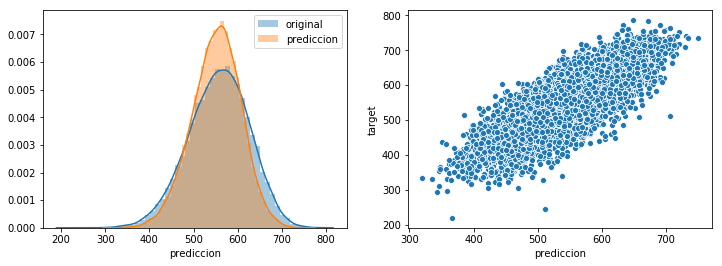

In [119]:
'''mmmm me parece que predice todo muy cerca de 500'''

import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,2,figsize=(12,4))

sns.distplot(PISA_2009_con_predicciones.target,label='original',ax=axes[0])
axes[0].legend()
sns.distplot(PISA_2009_con_predicciones.prediccion,label='prediccion',ax=axes[0])
axes[0].legend()

sns.scatterplot(data=PISA_2009_con_predicciones , x='prediccion',y='target',ax=axes[1])

In [109]:
PISA_2009_con_predicciones['error'] = PISA_2009_con_predicciones.prediccion - PISA_2009_con_predicciones.target
PISA_2009_con_predicciones['error_absoluto'] = np.abs(PISA_2009_con_predicciones.prediccion - PISA_2009_con_predicciones.target)

In [110]:
PISA_2009_con_predicciones.sort_values('error_absoluto')

,SCHOOLID,StIDStd,ST03Q02,AGE,BFMJ,BMMJ,HISEI,METASUM,UNDREM,PARED,...,TESTLANG_LATVIAN,TESTLANG_NOT APPLICABLE,TESTLANG_PORTUGUESE,TESTLANG_RUSSIAN,TESTLANG_SLOVAK,TESTLANG_SLOVENIAN,prediccion,target,error,error_absoluto
9730,9,361,12,15.67,69.0,59.0,69.0,0.9250,1.4152,15.0,...,0,0,0,0,0,0,662.784973,662.786000,-0.001027,0.001027
422224,1,17,9,15.50,29.0,53.0,53.0,0.0865,1.0488,12.0,...,0,0,0,0,1,0,423.583344,423.586667,-0.003323,0.003323
295082,97,2339,7,15.67,30.0,43.0,43.0,0.5058,-0.0504,16.0,...,1,0,0,0,0,0,561.845703,561.842000,0.003703,0.003703
231322,245,6924,11,15.33,67.0,60.0,67.0,1.3443,1.4152,17.0,...,0,0,0,0,0,0,644.455383,644.451333,0.004050,0.004050
203770,97,2457,1,16.17,38.0,54.0,54.0,0.5058,0.6824,13.5,...,0,0,0,0,0,0,536.815857,536.810667,0.005190,0.005190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239959,544,15561,9,15.50,65.0,51.0,65.0,1.3443,1.0488,17.0,...,0,0,0,0,0,0,619.847778,448.059333,171.788445,171.788445
240596,565,16198,5,15.92,54.0,29.0,54.0,-0.3327,1.4152,13.0,...,0,0,0,0,0,0,507.654877,326.642000,181.012877,181.012877
356527,30,835,1,15.58,71.0,69.0,71.0,0.9250,1.4152,15.0,...,0,0,0,0,0,0,706.372437,512.458000,193.914437,193.914437
22046,313,12677,6,16.17,21.0,16.0,21.0,1.3443,1.4152,11.0,...,0,0,0,0,0,0,537.774719,339.834667,197.940053,197.940053


## DIABETES historia

https://www.kaggle.com/brandao/diabetes?select=diabetic_data.csv


NO HACE BUENAS PREDICCIONES

In [5]:
diabetes = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/otros datasets/DIABETES_historia/diabetic_data.csv')

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
diabetes.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [8]:
'''mmmm, bueno uso NO y SI como output'''
diabetes['readmitted'] = np.where(diabetes.readmitted=='NO',1,0)

In [9]:
# diabetes.apply(lambda x: (x=='?').sum())

In [10]:
diabetes = diabetes.apply(lambda x: x.replace('?',np.nan))

In [11]:
# faltantes

# le saco los NA: primero filtrar las cols: las que tengan mas del 50% NA
diabetes_noNA = diabetes.drop(columns=[col for col in diabetes if (diabetes[col].isna().sum() > len(diabetes)/2)])
# ahora saco las filas con any NA
diabetes_noNA = diabetes_noNA.dropna(axis='rows',how='any')

print('original: ',diabetes.shape)
print('noNA: ',diabetes_noNA.shape)

original:  (101766, 50)
noNA:  (26755, 49)


In [12]:
diabetes_noNA.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,[70-80),1,22,7,7,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,1
20737,72848634,20377854,Caucasian,Female,[60-70),2,1,1,3,MC,...,No,Steady,No,No,No,No,No,No,Yes,1
20824,73062156,20408121,Caucasian,Female,[90-100),1,1,7,4,MC,...,No,No,No,No,No,No,No,No,Yes,1
21083,73731852,20542797,Caucasian,Male,[70-80),1,2,7,10,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,1
23879,81355914,7239654,Caucasian,Female,[70-80),1,3,6,12,UN,...,No,Steady,No,No,No,No,No,No,Yes,1


In [13]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers # helper functions

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras

# supress deprecation warnings from TF
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [14]:
vars_continuas = [col for col in diabetes.columns if diabetes[col].dtype=='int64']

vars_continuas

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'readmitted']

In [15]:
d = dice_ml.Data(dataframe=diabetes, \
    continuous_features= vars_continuas, \
    outcome_name='readmitted')

In [16]:
# aca entreno el modelo. Ya fue

train, _ = d.split_data(d.normalize_data(d.one_hot_encoded_data))
X_train = train.loc[:, train.columns != 'readmitted']
y_train = train.loc[:, train.columns == 'readmitted']

In [17]:
ann_model = keras.Sequential()
ann_model.add(keras.layers.Dense(50, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(25, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
ann_model.fit(X_train.values,y_train.values, validation_split=0.15, epochs=15)

Train on 69200 samples, validate on 12212 samples
Epoch 1/15
69200/69200 [==============================] - 13s 184us/sample - loss: 0.8628 - accuracy: 0.5404 - val_loss: 0.8600 - val_accuracy: 0.5361
Epoch 2/15
69200/69200 [==============================] - 11s 153us/sample - loss: 0.8519 - accuracy: 0.5406 - val_loss: 0.8567 - val_accuracy: 0.5361
Epoch 3/15
69200/69200 [==============================] - 11s 158us/sample - loss: 0.8519 - accuracy: 0.5406 - val_loss: 0.8547 - val_accuracy: 0.5361
Epoch 4/15
69200/69200 [==============================] - 11s 158us/sample - loss: 0.8518 - accuracy: 0.5406 - val_loss: 0.8450 - val_accuracy: 0.5361
Epoch 5/15
69200/69200 [==============================] - 11s 154us/sample - loss: 0.8518 - accuracy: 0.5406 - val_loss: 0.8626 - val_accuracy: 0.5361
Epoch 6/15
69200/69200 [==============================] - 9s 126us/sample - loss: 0.8519 - accuracy: 0.5406 - val_loss: 0.8552 - val_accuracy: 0.5361
Epoch 7/15
69200/69200 [=====================

In [18]:
backend = 'TF'+tf.__version__[0] 
m = dice_ml.Model(model=ann_model, backend=backend)

# initiate DiCE
exp = dice_ml.Dice(d, m)

In [19]:
usar_cf = 409112
query_instance = diabetes_noNA.drop(columns=['readmitted']).iloc[10,:]
query_instance = query_instance.to_dict()

print(len(query_instance))
query_instance

48


{'encounter_id': 81929988,
 'patient_nbr': 23748399,
 'race': 'Caucasian',
 'gender': 'Male',
 'age': '[80-90)',
 'admission_type_id': 5,
 'discharge_disposition_id': 2,
 'admission_source_id': 17,
 'time_in_hospital': 3,
 'payer_code': 'MC',
 'medical_specialty': 'Cardiology',
 'num_lab_procedures': 19,
 'num_procedures': 0,
 'num_medications': 11,
 'number_outpatient': 0,
 'number_emergency': 0,
 'number_inpatient': 0,
 'diag_1': '410',
 'diag_2': '396',
 'diag_3': '414',
 'number_diagnoses': 9,
 'max_glu_serum': 'Norm',
 'A1Cresult': 'None',
 'metformin': 'No',
 'repaglinide': 'No',
 'nateglinide': 'No',
 'chlorpropamide': 'No',
 'glimepiride': 'No',
 'acetohexamide': 'No',
 'glipizide': 'No',
 'glyburide': 'No',
 'tolbutamide': 'No',
 'pioglitazone': 'No',
 'rosiglitazone': 'No',
 'acarbose': 'No',
 'miglitol': 'No',
 'troglitazone': 'No',
 'tolazamide': 'No',
 'examide': 'No',
 'citoglipton': 'No',
 'insulin': 'No',
 'glyburide-metformin': 'No',
 'glipizide-metformin': 'No',
 'gli

In [20]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite",verbose=2)

/Users/lucaspecina/anaconda3/lib/python3.7/site-packages/dice_ml/dice_interfaces/dice_tensorflow2.py:147: RuntimeWarning: divide by zero encountered in double_scalars
  feature_weights[feature] = round(1/normalized_mads[feature], 2)


InvalidArgumentError: Matrix size-incompatible: In[0]: [1,2466], In[1]: [2465,50] [Op:MatMul]

## heart attack

In [185]:
heart = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/otros datasets/heart-dataset.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [186]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers # helper functions

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras

# supress deprecation warnings from TF
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [187]:
heart[['age','trestbps','chol','thalach']] = heart[['age','trestbps','chol','thalach']].apply(lambda x: x.astype('float64'))

heart[['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal','target']] = heart[['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal','target']].apply(lambda x: x.astype('category'))


In [188]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    category
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(10), float64(4)
memory usage: 15.3 KB


In [189]:
d = dice_ml.Data(dataframe=heart, 
    continuous_features=['age', 'trestbps','chol','thalach'], 
                 outcome_name='target')

In [190]:
train, _ = d.split_data(d.one_hot_encoded_data)
X_train = train.loc[:, train.columns != 'target']
y_train = train.loc[:, train.columns == 'target']

ann_model = keras.Sequential()
ann_model.add(keras.layers.Dense(20, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
ann_model.fit(X_train, y_train, validation_split=0.15, epochs=100, verbose=1)


Train on 205 samples, validate on 37 samples
Epoch 1/100
205/205 [==============================] - 1s 3ms/sample - loss: 34.3812 - accuracy: 0.4293 - val_loss: 13.7656 - val_accuracy: 0.4324
Epoch 2/100
205/205 [==============================] - 0s 146us/sample - loss: 5.6789 - accuracy: 0.4927 - val_loss: 3.6697 - val_accuracy: 0.5676
Epoch 3/100
205/205 [==============================] - 0s 150us/sample - loss: 3.7221 - accuracy: 0.5707 - val_loss: 3.0189 - val_accuracy: 0.5676
Epoch 4/100
205/205 [==============================] - 0s 220us/sample - loss: 1.5396 - accuracy: 0.5122 - val_loss: 1.3453 - val_accuracy: 0.4324
Epoch 5/100
205/205 [==============================] - 0s 211us/sample - loss: 1.1845 - accuracy: 0.4976 - val_loss: 0.9300 - val_accuracy: 0.4324
Epoch 6/100
205/205 [==============================] - 0s 213us/sample - loss: 1.0983 - accuracy: 0.4000 - val_loss: 0.9449 - val_accuracy: 0.5135
Epoch 7/100
205/205 [==============================] - 0s 152us/sample - 

In [ ]:
sns.distplot(ann_model.predict(X_train))

In [191]:
backend = 'TF'+tf.__version__[0]
m = dice_ml.Model(model=ann_model, backend=backend) 

# initiate DiCE
exp = dice_ml.Dice(d, m)

In [192]:
# query instance in the form of a dictionary; keys: feature name, values: feature value
query_instance = heart.loc[157,:].drop('target').to_dict()
query_instance

{'age': 35.0,
 'sex': 1,
 'cp': 1,
 'trestbps': 122.0,
 'chol': 192.0,
 'fbs': 0,
 'restecg': 1,
 'thalach': 174.0,
 'exang': 0,
 'oldpeak': 0.0,
 'slope': 2,
 'ca': 0,
 'thal': 2}

In [193]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, 
                total_CFs=4, desired_class="opposite",verbose=1,
                features_to_vary=['trestbps','chol','fbs'],
                proximity_weight=1.5, diversity_weight=1.0,
                                       max_iter=1000)

# visualize the resutls
dice_exp.visualize_as_dataframe()

step 1,  loss=33.8716
step 51,  loss=26.7631
step 101,  loss=26.7604
step 151,  loss=26.7598
step 201,  loss=26.7589
step 251,  loss=26.7589
step 301,  loss=26.7584
step 351,  loss=26.7475
step 401,  loss=26.7342
step 451,  loss=26.7307
step 501,  loss=26.7312
step 551,  loss=26.7311
step 601,  loss=26.7308
step 651,  loss=26.7307
step 701,  loss=26.7307
step 751,  loss=26.731
step 801,  loss=26.7315
step 851,  loss=26.7309
step 901,  loss=26.7309
step 951,  loss=26.7313


IndexError: list index out of range

viejo: 145
joven: 157
si pongo todos los mismos datos pero cambio solo la edad ? se puede ver las distintas recomendaciones con ese cambio

## Diabetes simple

In [126]:
pima = pd.read_csv('/Users/lucaspecina/Desktop/Data/TESIS/Explicaciones contrafacticas/otros datasets/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [127]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
list(pima.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [133]:
d = dice_ml.Data(dataframe=pima, 
    continuous_features=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age'], 
                 outcome_name='Outcome')

In [177]:
train, _ = d.split_data(d.one_hot_encoded_data)
X_train = train.loc[:, train.columns != 'Outcome']
y_train = train.loc[:, train.columns == 'Outcome']

ann_model = keras.Sequential()
ann_model.add(keras.layers.Dense(20, input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu))
ann_model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

ann_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
ann_model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1)


Train on 491 samples, validate on 123 samples
Epoch 1/100
491/491 [==============================] - 1s 3ms/sample - loss: 7.3566 - accuracy: 0.5845 - val_loss: 4.5718 - val_accuracy: 0.4472
Epoch 2/100
491/491 [==============================] - 0s 102us/sample - loss: 1.8689 - accuracy: 0.6171 - val_loss: 1.0733 - val_accuracy: 0.5610
Epoch 3/100
491/491 [==============================] - 0s 130us/sample - loss: 1.3300 - accuracy: 0.5927 - val_loss: 1.3998 - val_accuracy: 0.6748
Epoch 4/100
491/491 [==============================] - 0s 131us/sample - loss: 1.1430 - accuracy: 0.6293 - val_loss: 0.9687 - val_accuracy: 0.6992
Epoch 5/100
491/491 [==============================] - 0s 132us/sample - loss: 0.9020 - accuracy: 0.6090 - val_loss: 1.0653 - val_accuracy: 0.6260
Epoch 6/100
491/491 [==============================] - 0s 137us/sample - loss: 0.8640 - accuracy: 0.6843 - val_loss: 1.4262 - val_accuracy: 0.6585
Epoch 7/100
491/491 [==============================] - 0s 142us/sample - l

In [178]:
backend = 'TF'+tf.__version__[0]
m = dice_ml.Model(model=ann_model, backend=backend) 

# initiate DiCE
exp = dice_ml.Dice(d, m)

In [179]:
# query instance in the form of a dictionary; keys: feature name, values: feature value
query_instance = pima.loc[2,:].drop('Outcome').to_dict()
query_instance

{'Pregnancies': 8.0,
 'Glucose': 183.0,
 'BloodPressure': 64.0,
 'SkinThickness': 0.0,
 'Insulin': 0.0,
 'BMI': 23.299999237060547,
 'DiabetesPedigreeFunction': 0.671999990940094,
 'Age': 32.0}

In [183]:
# generate counterfactuals
dice_exp = exp.generate_counterfactuals(query_instance, 
                total_CFs=4, desired_class="opposite",verbose=1,
                                       max_iter=1000)

# visualize the resutls
dice_exp.visualize_as_dataframe()

step 1,  loss=3.10271
step 51,  loss=2.77472
step 101,  loss=2.75934
step 151,  loss=2.75875
step 201,  loss=2.76324
step 251,  loss=2.7647
step 301,  loss=2.76311
step 351,  loss=2.76235
step 401,  loss=2.76408
step 451,  loss=2.76668
step 501,  loss=2.77218
step 551,  loss=2.76792
step 601,  loss=2.76688
step 651,  loss=2.77009
step 701,  loss=2.77081
step 751,  loss=2.76699
step 801,  loss=2.76505
step 851,  loss=2.76119
step 901,  loss=2.76731
step 951,  loss=2.76651
Only 0 (required 4) Diverse Counterfactuals found for the given configuation, perhaps try with different values of proximity (or diversity) weights or learning rate... ; total time taken: 00 min 46 sec
Query instance (original outcome : 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0,0.076017



Diverse Counterfactual set (new outcome : 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,12.0,187.0,63.0,0.0,0.0,25.7,0.694,32.0,0.077
1,7.0,179.0,65.0,0.0,0.0,20.3,0.693,25.0,0.077
2,8.0,183.0,67.0,0.0,0.0,23.0,1.102,33.0,0.078
3,8.0,182.0,64.0,42.0,0.0,24.0,0.649,32.0,0.082


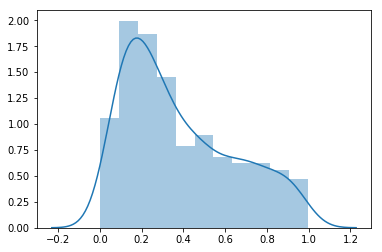

In [143]:
sns.distplot(ann_model.predict(X_train))

In [163]:
len(pd.Series(ann_model.predict(X_train)[:,0]))

614

In [170]:
pima_pred = pd.concat([X_train,pd.Series([pred[0] for pred in ann_model.predict(X_train)])],axis='columns')

# pima_pred[(pima_pred[0]>0.6) & (pima_pred[0]<0.7)].sort_values(0).head(50)
pima_pred.sort_values(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0
389,3,100,68,23,81,31.600000,0.949,28,0,0.000287
153,1,153,82,42,485,40.599998,0.687,23,0,0.000882
44,7,159,64,0,0,27.400000,0.294,40,0,0.007489
507,1,130,60,23,170,28.600000,0.692,21,0,0.011716
316,3,99,80,11,64,19.299999,0.284,30,0,0.032752
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,NaN
764,2,122,70,27,0,36.799999,0.340,27,0,NaN
765,5,121,72,23,112,26.200001,0.245,30,0,NaN
766,1,126,60,0,0,30.100000,0.349,47,1,NaN


DUDA FUNDAMENTAL

- Que pasa cuando uno entrena un modelo y hay variables muy correlacionadas que siempre cambian juntas. Como los modelos interpretan los cambios en una sola de esas variables? (no le cambia la probabilidad no?). Si entreno con datos de un horno y el indicador de temperatura 

- añadir el aspecto temporal (si a este individuo se le da este medicamento, pasa esto)

In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('ginssgn')

IndexError: list index out of range